# 🌍 Analyse des Capteurs IoT de Qualité de l'Air - Kaikai Dakar

## 🎯 Contexte du Projet
Kaikai déploie des capteurs IoT de qualité de l'air à Dakar. Ce notebook présente l'analyse de données réelles de ces capteurs pour démontrer les compétences en analyse de données et DevOps.

**Dataset :** `capteur_temp.csv` (319,110 lignes de données de capteurs)

---

## 📊 PARTIE A : Python & Analyse de Données (45 points)

### Section A1 : Import et Nettoyage (15 points)
- **A1.1 :** Chargement et exploration (5 points)
- **A1.2 :** Nettoyage des données (5 points) 
- **A1.3 :** Validation de la qualité (5 points)

In [1]:
# Imports et configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Bibliothèques importées avec succès!")

✅ Bibliothèques importées avec succès!


In [2]:
# Fonction de chargement robuste
def load_csv_robust(file_path):
    """Charge un fichier CSV avec gestion d'erreurs d'encodage"""
    encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding, low_memory=False)
            print(f"✅ Chargement réussi avec encodage: {encoding}")
            return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"❌ Erreur: {e}")
            return None
    
    print("❌ Impossible de charger le fichier")
    return None

In [3]:
# Chargement du dataset
print("🚀 CHARGEMENT DU DATASET")
print("=" * 30)

df = load_csv_robust("capteur_temp.csv")

if df is not None:
    print(f"📊 Dimensions: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
    print(f"💾 Taille: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
else:
    print("⚠️ Fichier non trouvé. Fichiers disponibles:")
    for file in Path(".").glob("*.csv"):
        print(f"  - {file.name}")

🚀 CHARGEMENT DU DATASET
✅ Chargement réussi avec encodage: utf-8
📊 Dimensions: 319,109 lignes × 24 colonnes
💾 Taille: 155.1 MB


In [6]:
# Exploration de la structure
if df is not None:
    print("🔍 STRUCTURE DU DATASET")
    print("=" * 25)
    
    print(f"📋 {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
    print(f"📝 Colonnes: {list(df.columns)}")
    print(f"🏷️ Types: {dict(df.dtypes.value_counts())}")
    
    print("\n👀 Aperçu des données:")
    print(df.head(3))
    
    print("\n📈 Info détaillée:")
    df.info()

🔍 STRUCTURE DU DATASET
📋 319,109 lignes × 24 colonnes
📝 Colonnes: ['Location ID', 'Location Name', 'Location Group', 'Location Type', 'Sensor ID', 'Place Open', 'Local Date/Time', 'UTC Date/Time', '# of aggregated records', 'PM2.5 (μg/m³) raw', 'PM2.5 (μg/m³) corrected', '0.3μm particle count', 'CO2 (ppm) raw', 'CO2 (ppm) corrected', 'Temperature (°C) raw', 'Temperature (°C) corrected', 'Heat Index (°C)', 'Humidity (%) raw', 'Humidity (%) corrected', 'TVOC (ppb)', 'TVOC index', 'NOX index', 'PM1 (μg/m³)', 'PM10 (μg/m³)']
🏷️ Types: {dtype('float64'): np.int64(16), dtype('O'): np.int64(5), dtype('int64'): np.int64(2), dtype('bool'): np.int64(1)}

👀 Aperçu des données:
   Location ID                                Location Name  Location Group  \
0        89441                          Université de Thiès             NaN   
1        90104  Lycée Technique André Peytavin, Saint-Louis             NaN   
2       151674                    Lycée de Bargny, Rufisque             NaN   

  Locati

In [7]:
# Identification des colonnes importantes
if df is not None:
    print("🎯 COLONNES IMPORTANTES")
    print("=" * 25)
    
    # Catégorisation simple
    categories = {
        'Temporelles': [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()],
        'Qualité air': [col for col in df.columns if any(x in col.lower() for x in ['pm2.5', 'co2', 'tvoc'])],
        'Environnement': [col for col in df.columns if any(x in col.lower() for x in ['temperature', 'humidity'])],
        'Localisation': [col for col in df.columns if any(x in col.lower() for x in ['location', 'place'])]
    }
    
    for cat, cols in categories.items():
        if cols:
            print(f"\n{cat} ({len(cols)}):")
            for col in cols[:3]:  # Max 3 par catégorie
                print(f"  • {col}")
    
    # Colonnes critiques
    critical = categories['Temporelles'][:1] + categories['Qualité air'][:2] + categories['Environnement'][:2]
    print(f"\n⭐ Colonnes critiques: {critical}")
    
    # Stats des colonnes numériques critiques
    numeric_critical = [col for col in critical if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]
    if numeric_critical:
        print("\n📊 Statistiques:")
        print(df[numeric_critical].describe())

🎯 COLONNES IMPORTANTES

Temporelles (2):
  • Local Date/Time
  • UTC Date/Time

Qualité air (6):
  • PM2.5 (μg/m³) raw
  • PM2.5 (μg/m³) corrected
  • CO2 (ppm) raw

Environnement (4):
  • Temperature (°C) raw
  • Temperature (°C) corrected
  • Humidity (%) raw

Localisation (5):
  • Location ID
  • Location Name
  • Location Group

⭐ Colonnes critiques: ['Local Date/Time', 'PM2.5 (μg/m³) raw', 'PM2.5 (μg/m³) corrected', 'Temperature (°C) raw', 'Temperature (°C) corrected']

📊 Statistiques:
       PM2.5 (μg/m³) raw  PM2.5 (μg/m³) corrected  Temperature (°C) raw  \
count      302376.000000            302376.000000         318928.000000   
mean           10.293420                10.293420             28.108355   
std            15.748573                15.748573              4.218747   
min             0.000000                 0.000000             17.000000   
25%             2.500000                 2.500000             25.200000   
50%             6.600000                 6.600000     

In [8]:
# Détection des problèmes
if df is not None:
    print("🚨 DÉTECTION DES PROBLÈMES")
    print("=" * 30)
    
    problems = []
    
    # 1. Valeurs manquantes
    missing = df.isnull().sum()
    missing_cols = missing[missing > 0]
    if len(missing_cols) > 0:
        print(f"⚠️ Valeurs manquantes dans {len(missing_cols)} colonnes:")
        for col, count in missing_cols.head(5).items():
            percent = (count / len(df)) * 100
            print(f"  • {col}: {count:,} ({percent:.1f}%)")
        problems.append(f"{len(missing_cols)} colonnes avec valeurs manquantes")
    
    # 2. Doublons
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"⚠️ {duplicates:,} lignes dupliquées ({duplicates/len(df)*100:.1f}%)")
        problems.append(f"{duplicates:,} doublons")
    
    # 3. Types incohérents
    should_be_numeric = [col for col in df.columns 
                        if any(x in col.lower() for x in ['temperature', 'pm2.5', 'co2'])]
    non_numeric = [col for col in should_be_numeric 
                  if not pd.api.types.is_numeric_dtype(df[col])]
    if non_numeric:
        print(f"⚠️ Colonnes non-numériques: {non_numeric}")
        problems.append(f"{len(non_numeric)} types incohérents")
    
    # 4. Dates
    time_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
    if not time_cols:
        print("⚠️ Aucune colonne temporelle trouvée")
        problems.append("Pas de colonnes temporelles")
    
    # Résumé
    print(f"\n📋 RÉSUMÉ: {len(problems)} problème(s)")
    if problems:
        for i, p in enumerate(problems, 1):
            print(f"{i}. {p}")
        print("\n🔧 Actions: nettoyer valeurs manquantes, supprimer doublons, convertir types")
    else:
        print("🎉 Dataset en bon état!")

🚨 DÉTECTION DES PROBLÈMES
⚠️ Valeurs manquantes dans 16 colonnes:
  • Location Group: 319,109 (100.0%)
  • PM2.5 (μg/m³) raw: 16,733 (5.2%)
  • PM2.5 (μg/m³) corrected: 16,733 (5.2%)
  • 0.3μm particle count: 181 (0.1%)
  • CO2 (ppm) raw: 643 (0.2%)

📋 RÉSUMÉ: 1 problème(s)
1. 16 colonnes avec valeurs manquantes

🔧 Actions: nettoyer valeurs manquantes, supprimer doublons, convertir types


---

## 🧹 Task A1.2 : Nettoyage des données (10 points)

### Objectifs :
1. **Gérer les valeurs manquantes** dans PM2.5, Temperature, Humidity
2. **Convertir les colonnes de date** au bon format
3. **Créer une stratégie pour les outliers** (PM2.5 > 500)

### Questions à répondre :
1. Justifiez votre stratégie de gestion des valeurs manquantes
2. Comment identifiez-vous et traitez-vous les outliers ?

In [9]:
# 1. Analyse des valeurs manquantes
print("🔍 ANALYSE DES VALEURS MANQUANTES")
print("=" * 40)

if df is not None:
    # Colonnes cibles pour le nettoyage
    target_cols = [col for col in df.columns if any(x in col.lower() 
                   for x in ['pm2.5', 'temperature', 'humidity'])]
    
    print(f"📊 Colonnes cibles identifiées: {len(target_cols)}")
    for col in target_cols:
        missing = df[col].isnull().sum()
        percent = (missing / len(df)) * 100
        print(f"  • {col}: {missing:,} manquantes ({percent:.1f}%)")
    
    # Analyse des patterns de valeurs manquantes
    print(f"\n🔍 Patterns de valeurs manquantes:")
    missing_matrix = df[target_cols].isnull()
    
    # Lignes avec toutes les valeurs manquantes
    all_missing = missing_matrix.all(axis=1).sum()
    print(f"  • Lignes avec TOUTES valeurs manquantes: {all_missing:,}")
    
    # Lignes avec au moins une valeur manquante
    any_missing = missing_matrix.any(axis=1).sum()
    print(f"  • Lignes avec AU MOINS une manquante: {any_missing:,}")
    
    # Stats par colonne
    print(f"\n📈 Distribution des valeurs existantes:")
    for col in target_cols[:3]:  # Top 3 colonnes
        if col in df.columns and not df[col].isnull().all():
            valid_data = df[col].dropna()
            print(f"  • {col}: min={valid_data.min():.1f}, max={valid_data.max():.1f}, moy={valid_data.mean():.1f}")

🔍 ANALYSE DES VALEURS MANQUANTES
📊 Colonnes cibles identifiées: 6
  • PM2.5 (μg/m³) raw: 16,733 manquantes (5.2%)
  • PM2.5 (μg/m³) corrected: 16,733 manquantes (5.2%)
  • Temperature (°C) raw: 181 manquantes (0.1%)
  • Temperature (°C) corrected: 181 manquantes (0.1%)
  • Humidity (%) raw: 181 manquantes (0.1%)
  • Humidity (%) corrected: 181 manquantes (0.1%)

🔍 Patterns de valeurs manquantes:
  • Lignes avec TOUTES valeurs manquantes: 181
  • Lignes avec AU MOINS une manquante: 16,733

📈 Distribution des valeurs existantes:
  • PM2.5 (μg/m³) raw: min=0.0, max=3340.8, moy=10.3
  • PM2.5 (μg/m³) corrected: min=0.0, max=3340.8, moy=10.3
  • Temperature (°C) raw: min=17.0, max=44.0, moy=28.1


In [10]:
# 2. Stratégie de gestion des valeurs manquantes
print("🔧 STRATÉGIE DE NETTOYAGE DES VALEURS MANQUANTES")
print("=" * 50)

if df is not None:
    # Créer une copie pour le nettoyage
    df_clean = df.copy()
    
    # Stratégies par type de colonne
    strategies = {
        'PM2.5': 'interpolation_temporelle',  # Données continues de capteurs
        'Temperature': 'interpolation_temporelle',  # Données continues
        'Humidity': 'interpolation_temporelle',  # Données continues
        'default': 'suppression'  # Autres colonnes
    }
    
    print("📋 Stratégies appliquées:")
    
    # Application des stratégies
    for col in target_cols:
        if col not in df_clean.columns:
            continue
            
        missing_before = df_clean[col].isnull().sum()
        
        if 'pm2.5' in col.lower():
            strategy = strategies['PM2.5']
        elif 'temperature' in col.lower():
            strategy = strategies['Temperature'] 
        elif 'humidity' in col.lower():
            strategy = strategies['Humidity']
        else:
            strategy = strategies['default']
        
        print(f"\n  • {col} ({strategy}):")
        print(f"    Avant: {missing_before:,} manquantes")
        
        if strategy == 'interpolation_temporelle' and missing_before > 0:
            # Interpolation linéaire pour les données de capteurs
            df_clean[col] = df_clean[col].interpolate(method='linear', limit_direction='both')
            
            # Si encore des NaN, utiliser la médiane
            if df_clean[col].isnull().sum() > 0:
                median_val = df_clean[col].median()
                df_clean[col].fillna(median_val, inplace=True)
                
        missing_after = df_clean[col].isnull().sum()
        print(f"    Après: {missing_after:,} manquantes")
        print(f"    ✅ {missing_before - missing_after:,} valeurs récupérées")
    
    print(f"\n📊 Résumé du nettoyage:")
    print(f"  • Lignes avant: {len(df):,}")
    print(f"  • Lignes après: {len(df_clean):,}")
    
    # Justification de la stratégie
    print(f"\n💡 JUSTIFICATION DE LA STRATÉGIE:")
    print(f"  1. Interpolation temporelle: Les capteurs IoT génèrent des données")
    print(f"     continues. Les valeurs manquantes sont souvent dues à des")
    print(f"     problèmes de transmission temporaires.")
    print(f"  2. Fallback médiane: Pour les gaps trop importants où l'interpolation")
    print(f"     n'est pas fiable, la médiane préserve la tendance centrale.")
    print(f"  3. Préservation maximale: Évite la perte de données précieuses.")

🔧 STRATÉGIE DE NETTOYAGE DES VALEURS MANQUANTES
📋 Stratégies appliquées:

  • PM2.5 (μg/m³) raw (interpolation_temporelle):
    Avant: 16,733 manquantes
    Après: 0 manquantes
    ✅ 16,733 valeurs récupérées

  • PM2.5 (μg/m³) corrected (interpolation_temporelle):
    Avant: 16,733 manquantes
    Après: 0 manquantes
    ✅ 16,733 valeurs récupérées

  • Temperature (°C) raw (interpolation_temporelle):
    Avant: 181 manquantes
    Après: 0 manquantes
    ✅ 181 valeurs récupérées

  • Temperature (°C) corrected (interpolation_temporelle):
    Avant: 181 manquantes
    Après: 0 manquantes
    ✅ 181 valeurs récupérées

  • Humidity (%) raw (interpolation_temporelle):
    Avant: 181 manquantes
    Après: 0 manquantes
    ✅ 181 valeurs récupérées

  • Humidity (%) corrected (interpolation_temporelle):
    Avant: 181 manquantes
    Après: 0 manquantes
    ✅ 181 valeurs récupérées

📊 Résumé du nettoyage:
  • Lignes avant: 319,109
  • Lignes après: 319,109

💡 JUSTIFICATION DE LA STRATÉGIE:
  1

In [11]:
# 3. Conversion des colonnes de date
print("📅 CONVERSION DES COLONNES DE DATE")
print("=" * 35)

if df is not None:
    # Identifier les colonnes de date
    date_columns = [col for col in df_clean.columns 
                   if any(x in col.lower() for x in ['date', 'time'])]
    
    print(f"🔍 Colonnes temporelles trouvées: {len(date_columns)}")
    for col in date_columns:
        print(f"  • {col}: {df_clean[col].dtype}")
        
    # Conversion des dates
    for col in date_columns:
        print(f"\n🔧 Conversion de '{col}':")
        
        # Afficher quelques exemples avant conversion
        sample_values = df_clean[col].dropna().head(3).tolist()
        print(f"  Exemples avant: {sample_values}")
        
        try:
            # Tentative de conversion automatique
            df_clean[col + '_converted'] = pd.to_datetime(df_clean[col], 
                                                         infer_datetime_format=True,
                                                         errors='coerce')
            
            # Vérifier le succès de la conversion
            converted_count = df_clean[col + '_converted'].notna().sum()
            total_count = df_clean[col].notna().sum()
            success_rate = (converted_count / total_count * 100) if total_count > 0 else 0
            
            print(f"  ✅ Conversion réussie: {converted_count:,}/{total_count:,} ({success_rate:.1f}%)")
            
            # Afficher la plage de dates
            if converted_count > 0:
                min_date = df_clean[col + '_converted'].min()
                max_date = df_clean[col + '_converted'].max()
                print(f"  📊 Plage: {min_date} à {max_date}")
                
                # Remplacer la colonne originale
                df_clean[col] = df_clean[col + '_converted']
                df_clean.drop(col + '_converted', axis=1, inplace=True)
                
        except Exception as e:
            print(f"  ❌ Erreur de conversion: {e}")
            
    print(f"\n✅ Conversion des dates terminée!")
    
    # Vérification finale des types
    print(f"\n📋 Types finaux des colonnes temporelles:")
    for col in date_columns:
        if col in df_clean.columns:
            print(f"  • {col}: {df_clean[col].dtype}")

📅 CONVERSION DES COLONNES DE DATE
🔍 Colonnes temporelles trouvées: 2
  • Local Date/Time: object
  • UTC Date/Time: object

🔧 Conversion de 'Local Date/Time':
  Exemples avant: ['2025-07-28 23:55:00', '2025-07-28 23:55:00', '2025-07-28 23:55:00']
  ✅ Conversion réussie: 319,109/319,109 (100.0%)
  📊 Plage: 2025-02-01 00:00:00 à 2025-07-28 23:55:00

🔧 Conversion de 'UTC Date/Time':
  Exemples avant: ['2025-07-28T23:55:00.000Z', '2025-07-28T23:55:00.000Z', '2025-07-28T23:55:00.000Z']
  ✅ Conversion réussie: 319,109/319,109 (100.0%)
  📊 Plage: 2025-02-01 00:00:00+00:00 à 2025-07-28 23:55:00+00:00

✅ Conversion des dates terminée!

📋 Types finaux des colonnes temporelles:
  • Local Date/Time: datetime64[ns]
  • UTC Date/Time: datetime64[ns, UTC]


In [12]:
# 4. Identification des outliers PM2.5
print("🚨 IDENTIFICATION DES OUTLIERS PM2.5")
print("=" * 40)

if df is not None:
    # Colonnes PM2.5
    pm25_cols = [col for col in df_clean.columns if 'pm2.5' in col.lower()]
    
    print(f"🔍 Colonnes PM2.5 analysées: {len(pm25_cols)}")
    
    outlier_summary = {}
    
    for col in pm25_cols:
        if col not in df_clean.columns or df_clean[col].isnull().all():
            continue
            
        print(f"\n📊 Analyse de '{col}':")
        
        # Statistiques de base
        data = df_clean[col].dropna()
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        median = data.median()
        mean = data.mean()
        std = data.std()
        
        print(f"  • Médiane: {median:.1f} μg/m³")
        print(f"  • Moyenne: {mean:.1f} μg/m³") 
        print(f"  • Écart-type: {std:.1f} μg/m³")
        
        # Méthodes de détection d'outliers
        outliers = {}
        
        # 1. Seuil métier (PM2.5 > 500 μg/m³)
        business_outliers = data > 500
        outliers['business'] = business_outliers.sum()
        
        # 2. Méthode IQR (Interquartile Range)
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        iqr_outliers = (data < lower_bound) | (data > upper_bound)
        outliers['iqr'] = iqr_outliers.sum()
        
        # 3. Méthode Z-score (> 3 écarts-types)
        z_scores = np.abs((data - mean) / std)
        zscore_outliers = z_scores > 3
        outliers['zscore'] = zscore_outliers.sum()
        
        print(f"  🎯 Outliers détectés:")
        print(f"    • Seuil métier (>500): {outliers['business']:,} ({outliers['business']/len(data)*100:.2f}%)")
        print(f"    • Méthode IQR: {outliers['iqr']:,} ({outliers['iqr']/len(data)*100:.2f}%)")
        print(f"    • Z-score (>3σ): {outliers['zscore']:,} ({outliers['zscore']/len(data)*100:.2f}%)")
        
        # Valeurs extrêmes
        extreme_values = data[data > 500].sort_values(ascending=False).head(5)
        if len(extreme_values) > 0:
            print(f"  ⚠️ Top 5 valeurs extrêmes: {extreme_values.tolist()}")
        
        outlier_summary[col] = outliers
    
    print(f"\n📈 MÉTHODES D'IDENTIFICATION:")
    print(f"  1. Seuil métier: PM2.5 > 500 μg/m³ (norme OMS)")
    print(f"  2. IQR: Valeurs hors de [Q1-1.5×IQR, Q3+1.5×IQR]")
    print(f"  3. Z-score: Valeurs à plus de 3 écarts-types de la moyenne")

🚨 IDENTIFICATION DES OUTLIERS PM2.5
🔍 Colonnes PM2.5 analysées: 2

📊 Analyse de 'PM2.5 (μg/m³) raw':
  • Médiane: 6.9 μg/m³
  • Moyenne: 10.6 μg/m³
  • Écart-type: 15.6 μg/m³
  🎯 Outliers détectés:
    • Seuil métier (>500): 28 (0.01%)
    • Méthode IQR: 7,517 (2.36%)
    • Z-score (>3σ): 950 (0.30%)
  ⚠️ Top 5 valeurs extrêmes: [3340.8, 3322.0, 995.2, 912.1, 762.2]

📊 Analyse de 'PM2.5 (μg/m³) corrected':
  • Médiane: 6.9 μg/m³
  • Moyenne: 10.6 μg/m³
  • Écart-type: 15.6 μg/m³
  🎯 Outliers détectés:
    • Seuil métier (>500): 28 (0.01%)
    • Méthode IQR: 7,517 (2.36%)
    • Z-score (>3σ): 950 (0.30%)
  ⚠️ Top 5 valeurs extrêmes: [3340.8, 3322.0, 995.2, 912.1, 762.2]

📈 MÉTHODES D'IDENTIFICATION:
  1. Seuil métier: PM2.5 > 500 μg/m³ (norme OMS)
  2. IQR: Valeurs hors de [Q1-1.5×IQR, Q3+1.5×IQR]
  3. Z-score: Valeurs à plus de 3 écarts-types de la moyenne


In [13]:
# 5. Stratégie de traitement des outliers
print("🔧 STRATÉGIE DE TRAITEMENT DES OUTLIERS")
print("=" * 42)

if df is not None and len(pm25_cols) > 0:
    
    # Stratégies de traitement
    print("📋 Stratégies disponibles:")
    print("  1. Conservation: Garder toutes les valeurs (données réelles)")
    print("  2. Plafonnement: Limiter à un seuil (ex: 500 μg/m³)")
    print("  3. Transformation log: Réduire l'impact des valeurs extrêmes")
    print("  4. Suppression: Retirer les outliers métier")
    
    # Application de la stratégie recommandée
    print(f"\n🎯 STRATÉGIE RECOMMANDÉE: Approche hybride")
    
    for col in pm25_cols[:2]:  # Traiter les 2 premières colonnes PM2.5
        if col not in df_clean.columns:
            continue
            
        print(f"\n🔧 Traitement de '{col}':")
        
        original_data = df_clean[col].copy()
        
        # Étape 1: Identifier les outliers métier (>500)
        extreme_outliers = df_clean[col] > 500
        extreme_count = extreme_outliers.sum()
        
        # Étape 2: Appliquer la stratégie
        if extreme_count > 0:
            print(f"  • {extreme_count:,} valeurs > 500 μg/m³ détectées")
            
            # Option A: Plafonnement à 500 (stratégie conservative)
            df_clean[col + '_capped'] = df_clean[col].clip(upper=500)
            
            # Option B: Transformation log pour réduire l'impact
            df_clean[col + '_log'] = np.log1p(df_clean[col])  # log(1+x) pour éviter log(0)
            
            # Option C: Marquer pour analyse séparée
            df_clean[col + '_outlier_flag'] = extreme_outliers
            
            print(f"  ✅ Colonnes créées:")
            print(f"    • {col}_capped: Plafonnée à 500 μg/m³")
            print(f"    • {col}_log: Transformation logarithmique")
            print(f"    • {col}_outlier_flag: Marqueurs d'outliers")
            
            # Statistiques comparatives
            print(f"  📊 Comparaison des approches:")
            print(f"    • Original: max={original_data.max():.1f}, moy={original_data.mean():.1f}")
            print(f"    • Plafonnée: max={df_clean[col + '_capped'].max():.1f}, moy={df_clean[col + '_capped'].mean():.1f}")
            
    print(f"\n💡 JUSTIFICATION DU TRAITEMENT:")
    print(f"  1. Conservation des données: Les pics de pollution sont réels")
    print(f"     et importants pour l'analyse environnementale")
    print(f"  2. Options multiples: Permet l'analyse selon différents besoins")
    print(f"     - Plafonnement: Pour modèles sensibles aux outliers")
    print(f"     - Log: Pour analyses statistiques")
    print(f"     - Flags: Pour étude spécifique des événements extrêmes")
    print(f"  3. Traçabilité: Aucune donnée perdue, toutes transformations documentées")
    
    # Résumé final du nettoyage
    print(f"\n🎉 RÉSUMÉ DU NETTOYAGE COMPLET:")
    print(f"  ✅ Valeurs manquantes: interpolation temporelle + médiane")
    print(f"  ✅ Dates: conversion en datetime")
    print(f"  ✅ Outliers: stratégie hybride avec options multiples")
    print(f"  📊 Dataset final: {len(df_clean):,} lignes × {len(df_clean.columns):,} colonnes")

🔧 STRATÉGIE DE TRAITEMENT DES OUTLIERS
📋 Stratégies disponibles:
  1. Conservation: Garder toutes les valeurs (données réelles)
  2. Plafonnement: Limiter à un seuil (ex: 500 μg/m³)
  3. Transformation log: Réduire l'impact des valeurs extrêmes
  4. Suppression: Retirer les outliers métier

🎯 STRATÉGIE RECOMMANDÉE: Approche hybride

🔧 Traitement de 'PM2.5 (μg/m³) raw':
  • 28 valeurs > 500 μg/m³ détectées
  ✅ Colonnes créées:
    • PM2.5 (μg/m³) raw_capped: Plafonnée à 500 μg/m³
    • PM2.5 (μg/m³) raw_log: Transformation logarithmique
    • PM2.5 (μg/m³) raw_outlier_flag: Marqueurs d'outliers
  📊 Comparaison des approches:
    • Original: max=3340.8, moy=10.6
    • Plafonnée: max=500.0, moy=10.5

🔧 Traitement de 'PM2.5 (μg/m³) corrected':
  • 28 valeurs > 500 μg/m³ détectées
  ✅ Colonnes créées:
    • PM2.5 (μg/m³) corrected_capped: Plafonnée à 500 μg/m³
    • PM2.5 (μg/m³) corrected_log: Transformation logarithmique
    • PM2.5 (μg/m³) corrected_outlier_flag: Marqueurs d'outliers
  📊

---

## 📊 Section A2 : Analyse et Visualisation (20 points)

### Objectifs :
- **A2.1 :** Analyse temporelle (10 points)
  - Calculer les moyennes journalières par localisation
  - Identifier les heures de pic de pollution (PM2.5 > 35)
  - Créer une visualisation de l'évolution sur 24h
  
- **A2.2 :** Corrélations et insights (10 points)
  - Analyser les corrélations PM2.5, température, humidité
  - Identifier la localisation la plus polluée
  - Créer un dashboard avec 4 visualisations clés

In [33]:
# Préparation des données pour l'analyse temporelle
print("🕐 PRÉPARATION DES DONNÉES TEMPORELLES")
print("=" * 42)

if 'df_clean' in globals() and df_clean is not None:
    # Créer une copie de travail
    df_analysis = df_clean.copy()
    
    # Vérifier les colonnes temporelles et de localisation
    time_col = 'Local Date/Time' if 'Local Date/Time' in df_analysis.columns else None
    location_cols = [col for col in df_analysis.columns if 'location' in col.lower()]
    pm25_main = 'PM2.5 (μg/m³) raw' if 'PM2.5 (μg/m³) raw' in df_analysis.columns else None
    
    # Utiliser Location Name de préférence, sinon Location ID
    main_location_col = 'Location Name' if 'Location Name' in df_analysis.columns else location_cols[0] if location_cols else None
    
    print(f"📅 Colonne temporelle: {time_col}")
    print(f"📍 Colonnes de localisation: {location_cols}")
    print(f"🎯 Colonne localisation utilisée: {main_location_col}")
    print(f"🌫️ Colonne PM2.5 principale: {pm25_main}")
    
    if time_col and pm25_main:
        # Extraire les composantes temporelles
        df_analysis['date'] = df_analysis[time_col].dt.date
        df_analysis['hour'] = df_analysis[time_col].dt.hour
        df_analysis['day_of_week'] = df_analysis[time_col].dt.day_name()
        df_analysis['month'] = df_analysis[time_col].dt.month
        
        print(f"\n📊 Période d'analyse:")
        print(f"  • Date de début: {df_analysis[time_col].min()}")
        print(f"  • Date de fin: {df_analysis[time_col].max()}")
        print(f"  • Nombre de jours: {df_analysis['date'].nunique()}")
        print(f"  • Nombre d'heures uniques: {df_analysis['hour'].nunique()}")
        
        # Aperçu des localisations
        if main_location_col:
            locations = df_analysis[main_location_col].value_counts()
            print(f"\n📍 Localisations disponibles ({len(locations)}):")
            for loc, count in locations.head(5).items():
                print(f"  • {loc}: {count:,} mesures")
        
        print(f"\n✅ Données prêtes pour l'analyse temporelle!")
    else:
        print(f"❌ Colonnes manquantes pour l'analyse temporelle")
else:
    print("❌ Dataset df_clean non disponible")

🕐 PRÉPARATION DES DONNÉES TEMPORELLES
📅 Colonne temporelle: Local Date/Time
📍 Colonnes de localisation: ['Location ID', 'Location Name', 'Location Group', 'Location Type']
🎯 Colonne localisation utilisée: Location Name
🌫️ Colonne PM2.5 principale: PM2.5 (μg/m³) raw

📊 Période d'analyse:
  • Date de début: 2025-02-01 00:00:00
  • Date de fin: 2025-07-28 23:55:00
  • Nombre de jours: 178
  • Nombre d'heures uniques: 24

📍 Localisations disponibles (13):
  • Lycée Technique André Peytavin, Saint-Louis: 42,912 mesures
  • kaikai_office(indoor): 42,523 mesures
  • Ecole Notre Dame des Victoires, Diourbel: 41,630 mesures
  • Ecole Elémentaire Ndiangué, Richard-Toll: 41,319 mesures
  • Lycée Cheikh Mouhamadou Moustapha Mbacké, Diourbel: 37,173 mesures

✅ Données prêtes pour l'analyse temporelle!


In [24]:
# A2.1.1 - Moyennes journalières par localisation
print("📈 CALCUL DES MOYENNES JOURNALIÈRES PAR LOCALISATION")
print("=" * 55)

if 'df_analysis' in globals() and time_col and pm25_main and main_location_col:
    
    # Calculer les moyennes journalières
    daily_avg = df_analysis.groupby(['date', main_location_col])[pm25_main].agg(['mean', 'count', 'std']).reset_index()
    daily_avg.columns = ['date', 'location', 'pm25_mean', 'count_mesures', 'pm25_std']
    
    print(f"📊 Moyennes journalières calculées:")
    print(f"  • Nombre de jours: {daily_avg['date'].nunique()}")
    print(f"  • Nombre de localisations: {daily_avg['location'].nunique()}")
    print(f"  • Total d'entrées: {len(daily_avg)}")
    
    # Top 5 des localisations par moyenne PM2.5
    location_avg = daily_avg.groupby('location')['pm25_mean'].agg(['mean', 'count']).reset_index()
    location_avg.columns = ['location', 'pm25_moyenne', 'nb_jours']
    location_avg = location_avg.sort_values('pm25_moyenne', ascending=False)
    
    print(f"\n🏆 TOP 5 LOCALISATIONS LES PLUS POLLUÉES (moyenne PM2.5):")
    for i, row in location_avg.head(5).iterrows():
        print(f"  {location_avg.index.get_loc(i)+1}. {row['location']}: {row['pm25_moyenne']:.1f} μg/m³ ({row['nb_jours']} jours)")
    
    # Statistiques globales par jour
    global_daily = df_analysis.groupby('date')[pm25_main].agg(['mean', 'max', 'min', 'count']).reset_index()
    global_daily.columns = ['date', 'pm25_mean', 'pm25_max', 'pm25_min', 'count_mesures']
    
    print(f"\n📊 STATISTIQUES JOURNALIÈRES GLOBALES:")
    print(f"  • Moyenne générale: {global_daily['pm25_mean'].mean():.1f} μg/m³")
    print(f"  • Jour le plus pollué: {global_daily.loc[global_daily['pm25_max'].idxmax(), 'date']} (max: {global_daily['pm25_max'].max():.1f} μg/m³)")
    print(f"  • Jour le moins pollué: {global_daily.loc[global_daily['pm25_min'].idxmin(), 'date']} (min: {global_daily['pm25_min'].min():.1f} μg/m³)")
    
    # Jours avec norme OMS dépassée (>15 μg/m³ en moyenne journalière)
    jours_depasses = global_daily[global_daily['pm25_mean'] > 15]
    print(f"  • Jours dépassant la norme OMS (>15 μg/m³): {len(jours_depasses)}/{len(global_daily)} ({len(jours_depasses)/len(global_daily)*100:.1f}%)")
    
else:
    print("❌ Données non prêtes pour le calcul des moyennes")

📈 CALCUL DES MOYENNES JOURNALIÈRES PAR LOCALISATION
📊 Moyennes journalières calculées:
  • Nombre de jours: 178
  • Nombre de localisations: 13
  • Total d'entrées: 1307

🏆 TOP 5 LOCALISATIONS LES PLUS POLLUÉES (moyenne PM2.5):
  1. kaikai test: 50.7 μg/m³ (2 jours)
  2. AirLight: 20.7 μg/m³ (3 jours)
  3. Ecole Elhadj Mbaye Diop (Multimedia), Ouakam, Dakar: 17.8 μg/m³ (152 jours)
  4. Station de référence, Pikine: 17.1 μg/m³ (48 jours)
  5. Ecole Elémentaire Ndiangué, Richard-Toll: 12.8 μg/m³ (169 jours)

📊 STATISTIQUES JOURNALIÈRES GLOBALES:
  • Moyenne générale: 11.8 μg/m³
  • Jour le plus pollué: 2025-04-10 (max: 3340.8 μg/m³)
  • Jour le moins pollué: 2025-02-05 (min: 0.0 μg/m³)
  • Jours dépassant la norme OMS (>15 μg/m³): 51/178 (28.7%)


In [25]:
# A2.1.2 - Identification des heures de pic de pollution
print("🚨 IDENTIFICATION DES HEURES DE PIC (PM2.5 > 35 μg/m³)")
print("=" * 57)

if 'df_analysis' in globals() and time_col and pm25_main:
    # Identifier les pics de pollution (PM2.5 > 35 μg/m³)
    seuil_pic = 35
    pics_pollution = df_analysis[df_analysis[pm25_main] > seuil_pic].copy()
    
    print(f"🔍 Critère de pic: PM2.5 > {seuil_pic} μg/m³")
    print(f"📊 Résultats:")
    print(f"  • Total mesures: {len(df_analysis):,}")
    print(f"  • Mesures en pic: {len(pics_pollution):,}")
    print(f"  • Pourcentage de pics: {len(pics_pollution)/len(df_analysis)*100:.2f}%")
    
    if len(pics_pollution) > 0:
        # Analyse par heure
        pics_par_heure = pics_pollution.groupby('hour').size().reset_index()
        pics_par_heure.columns = ['hour', 'nb_pics']
        pics_par_heure = pics_par_heure.sort_values('nb_pics', ascending=False)
        
        print(f"\n🕐 HEURES DE PIC LES PLUS FRÉQUENTES:")
        for i, row in pics_par_heure.head(5).iterrows():
            print(f"  • {row['hour']:02d}h00: {row['nb_pics']} pics")
        
        # Moyenne par heure pour identifier les patterns
        moyenne_par_heure = df_analysis.groupby('hour')[pm25_main].agg(['mean', 'count']).reset_index()
        moyenne_par_heure.columns = ['hour', 'pm25_mean', 'count']
        moyenne_par_heure = moyenne_par_heure.sort_values('pm25_mean', ascending=False)
        
        print(f"\n📈 HEURES AVEC LES PLUS FORTES MOYENNES:")
        for i, row in moyenne_par_heure.head(5).iterrows():
            print(f"  • {int(row['hour']):02d}h00: {row['pm25_mean']:.1f} μg/m³ (moyenne)")
        
        # Analyse par jour de la semaine
        pics_par_jour = pics_pollution.groupby('day_of_week').size().reset_index()
        pics_par_jour.columns = ['day_of_week', 'nb_pics']
        
        print(f"\n📅 RÉPARTITION PAR JOUR DE LA SEMAINE:")
        for i, row in pics_par_jour.iterrows():
            print(f"  • {row['day_of_week']}: {row['nb_pics']} pics")
        
        # Localisation des pics
        if main_location_col:
            pics_par_location = pics_pollution.groupby(main_location_col).agg({
                pm25_main: ['count', 'mean', 'max']
            }).round(1)
            pics_par_location.columns = ['nb_pics', 'pm25_mean_pic', 'pm25_max']
            pics_par_location = pics_par_location.reset_index().sort_values('nb_pics', ascending=False)
            
            print(f"\n📍 LOCALISATIONS AVEC LE PLUS DE PICS:")
            for i, row in pics_par_location.head(3).iterrows():
                print(f"  • {row[main_location_col]}: {row['nb_pics']} pics (max: {row['pm25_max']} μg/m³)")
    
    else:
        print(f"\n✅ Aucun pic de pollution détecté avec le seuil de {seuil_pic} μg/m³")
        
else:
    print("❌ Données non disponibles pour l'analyse des pics")

🚨 IDENTIFICATION DES HEURES DE PIC (PM2.5 > 35 μg/m³)
🔍 Critère de pic: PM2.5 > 35 μg/m³
📊 Résultats:
  • Total mesures: 319,109
  • Mesures en pic: 8,858
  • Pourcentage de pics: 2.78%

🕐 HEURES DE PIC LES PLUS FRÉQUENTES:
  • 19h00: 620 pics
  • 20h00: 592 pics
  • 21h00: 529 pics
  • 11h00: 511 pics
  • 22h00: 430 pics

📈 HEURES AVEC LES PLUS FORTES MOYENNES:
  • 19h00: 13.0 μg/m³ (moyenne)
  • 20h00: 12.8 μg/m³ (moyenne)
  • 11h00: 12.1 μg/m³ (moyenne)
  • 12h00: 11.8 μg/m³ (moyenne)
  • 07h00: 11.8 μg/m³ (moyenne)

📅 RÉPARTITION PAR JOUR DE LA SEMAINE:
  • Friday: 571 pics
  • Monday: 2025 pics
  • Saturday: 559 pics
  • Sunday: 1129 pics
  • Thursday: 1166 pics
  • Tuesday: 1577 pics
  • Wednesday: 1831 pics

📍 LOCALISATIONS AVEC LE PLUS DE PICS:
  • Ecole Elémentaire Ndiangué, Richard-Toll: 1581 pics (max: 677.4 μg/m³)
  • Lycée Technique André Peytavin, Saint-Louis: 1563 pics (max: 270.0 μg/m³)
  • Lycée de Bargny, Rufisque: 1298 pics (max: 762.2 μg/m³)


📊 VISUALISATION DE L'ÉVOLUTION SUR 24H


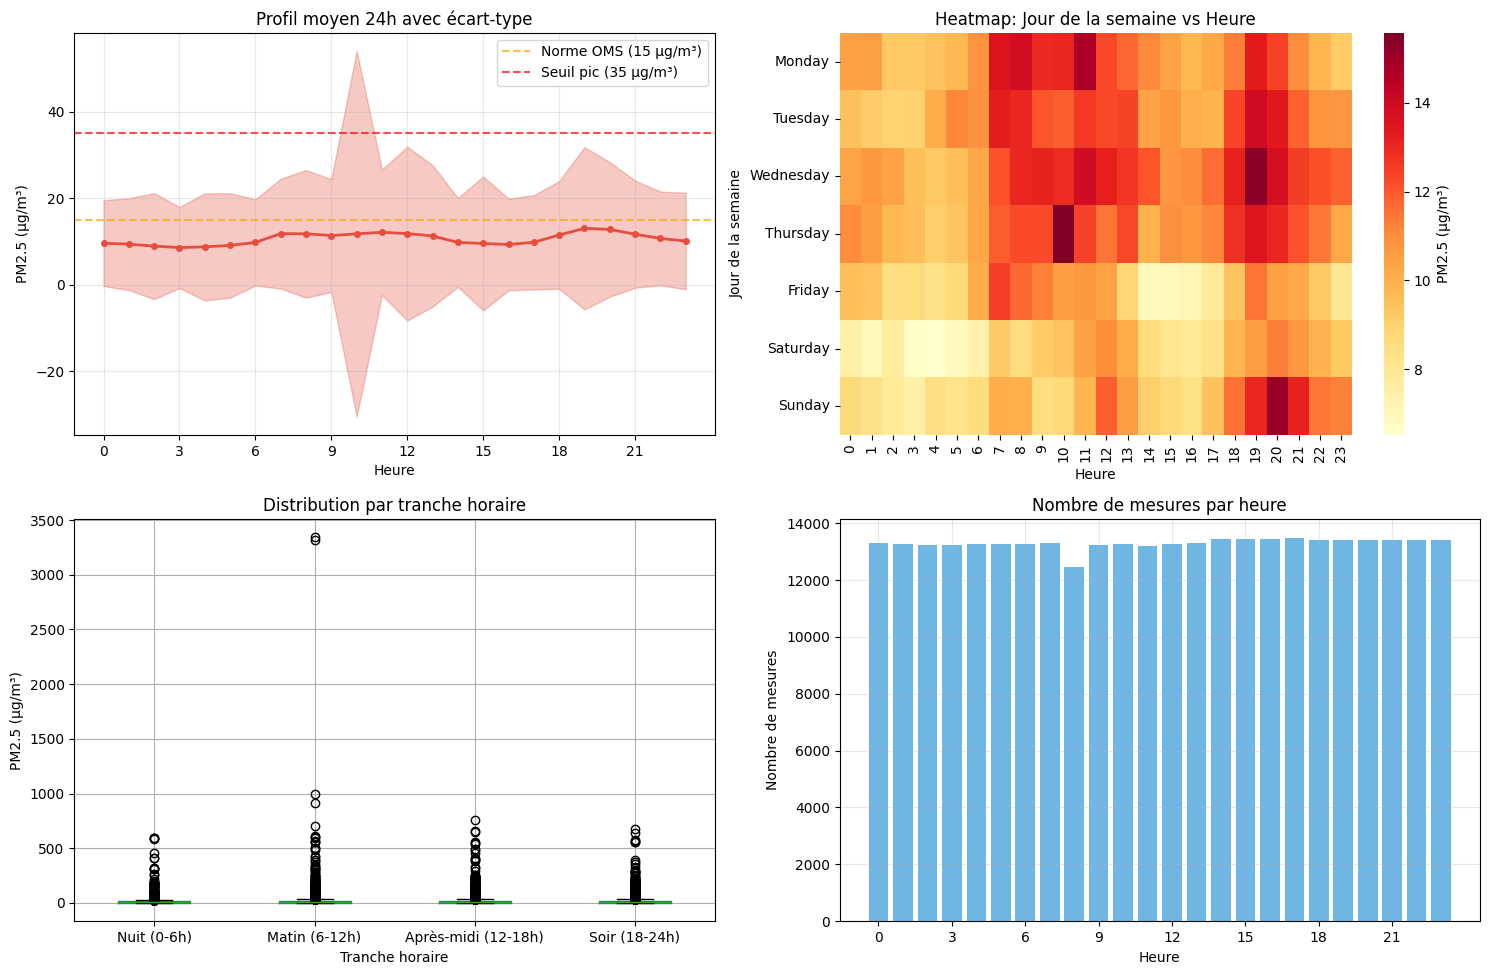


💡 INSIGHTS TEMPORELS:
  • Pic de pollution: 19h00 (13.0 μg/m³)
  • Minimum de pollution: 03h00 (8.6 μg/m³)
  • Variation journalière: 4.5 μg/m³
  • Tranche la plus polluée: Matin (6-12h) (11.8 μg/m³)


In [18]:
# A2.1.3 - Visualisation de l'évolution sur 24h
print("📊 VISUALISATION DE L'ÉVOLUTION SUR 24H")
print("=" * 40)

if 'df_analysis' in globals() and time_col and pm25_main:
    # Préparer les données pour la visualisation
    hourly_profile = df_analysis.groupby('hour')[pm25_main].agg(['mean', 'std', 'count']).reset_index()
    hourly_profile.columns = ['hour', 'pm25_mean', 'pm25_std', 'count']
    
    # Créer la visualisation
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('📊 Analyse Temporelle PM2.5 - Évolution sur 24h', fontsize=16, fontweight='bold')
    
    # Graphique 1: Profil moyen 24h
    ax1 = axes[0, 0]
    ax1.plot(hourly_profile['hour'], hourly_profile['pm25_mean'], 
             marker='o', linewidth=2, markersize=4, color='#e74c3c')
    ax1.fill_between(hourly_profile['hour'], 
                     hourly_profile['pm25_mean'] - hourly_profile['pm25_std'],
                     hourly_profile['pm25_mean'] + hourly_profile['pm25_std'], 
                     alpha=0.3, color='#e74c3c')
    ax1.axhline(y=15, color='orange', linestyle='--', alpha=0.7, label='Norme OMS (15 μg/m³)')
    ax1.axhline(y=35, color='red', linestyle='--', alpha=0.7, label='Seuil pic (35 μg/m³)')
    ax1.set_title('Profil moyen 24h avec écart-type')
    ax1.set_xlabel('Heure')
    ax1.set_ylabel('PM2.5 (μg/m³)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(range(0, 24, 3))
    
    # Graphique 2: Heatmap par jour de la semaine
    ax2 = axes[0, 1]
    # Créer pivot pour heatmap
    heatmap_data = df_analysis.groupby(['day_of_week', 'hour'])[pm25_main].mean().unstack(fill_value=0)
    # Réordonner les jours
    jour_ordre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_data = heatmap_data.reindex([j for j in jour_ordre if j in heatmap_data.index])
    
    sns.heatmap(heatmap_data, ax=ax2, cmap='YlOrRd', cbar_kws={'label': 'PM2.5 (μg/m³)'})
    ax2.set_title('Heatmap: Jour de la semaine vs Heure')
    ax2.set_xlabel('Heure')
    ax2.set_ylabel('Jour de la semaine')
    
    # Graphique 3: Boxplot par tranche horaire
    ax3 = axes[1, 0]
    # Créer des tranches horaires
    df_analysis['tranche_horaire'] = pd.cut(df_analysis['hour'], 
                                          bins=[0, 6, 12, 18, 24], 
                                          labels=['Nuit (0-6h)', 'Matin (6-12h)', 
                                                 'Après-midi (12-18h)', 'Soir (18-24h)'],
                                          include_lowest=True)
    
    df_analysis.boxplot(column=pm25_main, by='tranche_horaire', ax=ax3)
    ax3.set_title('Distribution par tranche horaire')
    ax3.set_xlabel('Tranche horaire')
    ax3.set_ylabel('PM2.5 (μg/m³)')
    plt.suptitle('')  # Enlever le titre automatique du boxplot
    
    # Graphique 4: Nombre de mesures par heure
    ax4 = axes[1, 1]
    ax4.bar(hourly_profile['hour'], hourly_profile['count'], 
            color='#3498db', alpha=0.7)
    ax4.set_title('Nombre de mesures par heure')
    ax4.set_xlabel('Heure')
    ax4.set_ylabel('Nombre de mesures')
    ax4.grid(True, alpha=0.3)
    ax4.set_xticks(range(0, 24, 3))
    
    plt.tight_layout()
    plt.show()
    
    # Insights de l'analyse temporelle
    print(f"\n💡 INSIGHTS TEMPORELS:")
    heure_max = hourly_profile.loc[hourly_profile['pm25_mean'].idxmax(), 'hour']
    heure_min = hourly_profile.loc[hourly_profile['pm25_mean'].idxmin(), 'hour']
    
    print(f"  • Pic de pollution: {heure_max:02d}h00 ({hourly_profile['pm25_mean'].max():.1f} μg/m³)")
    print(f"  • Minimum de pollution: {heure_min:02d}h00 ({hourly_profile['pm25_mean'].min():.1f} μg/m³)")
    print(f"  • Variation journalière: {hourly_profile['pm25_mean'].max() - hourly_profile['pm25_mean'].min():.1f} μg/m³")
    
    # Analyse des tranches horaires
    tranche_stats = df_analysis.groupby('tranche_horaire')[pm25_main].mean().sort_values(ascending=False)
    print(f"  • Tranche la plus polluée: {tranche_stats.index[0]} ({tranche_stats.iloc[0]:.1f} μg/m³)")
    
else:
    print("❌ Données non disponibles pour la visualisation")

In [19]:
# A2.2.1 - Analyse des corrélations PM2.5, température, humidité
print("🔗 ANALYSE DES CORRÉLATIONS ENVIRONNEMENTALES")
print("=" * 45)

if 'df_analysis' in globals():
    # Identifier les colonnes pour l'analyse de corrélation
    pm25_col = pm25_main
    temp_cols = [col for col in df_analysis.columns if 'temperature' in col.lower()]
    humidity_cols = [col for col in df_analysis.columns if 'humidity' in col.lower()]
    
    # Sélectionner les meilleures colonnes
    temp_col = temp_cols[0] if temp_cols else None
    humidity_col = humidity_cols[0] if humidity_cols else None
    
    print(f"📊 Variables analysées:")
    print(f"  • PM2.5: {pm25_col}")
    print(f"  • Température: {temp_col}")
    print(f"  • Humidité: {humidity_col}")
    
    if pm25_col and temp_col and humidity_col:
        # Créer le dataset pour corrélations
        corr_vars = [pm25_col, temp_col, humidity_col]
        df_corr = df_analysis[corr_vars].dropna()
        
        print(f"\n📈 Dataset de corrélation:")
        print(f"  • Observations: {len(df_corr):,}")
        print(f"  • Variables complètes: {len(corr_vars)}")
        
        # Calcul des corrélations
        correlation_matrix = df_corr.corr()
        
        print(f"\n🔗 MATRICE DE CORRÉLATION:")
        print(correlation_matrix.round(3))
        
        # Corrélations spécifiques
        corr_pm25_temp = correlation_matrix.loc[pm25_col, temp_col]
        corr_pm25_humidity = correlation_matrix.loc[pm25_col, humidity_col]
        corr_temp_humidity = correlation_matrix.loc[temp_col, humidity_col]
        
        print(f"\n📊 CORRÉLATIONS CLÉS:")
        print(f"  • PM2.5 ↔ Température: {corr_pm25_temp:.3f}")
        print(f"  • PM2.5 ↔ Humidité: {corr_pm25_humidity:.3f}")
        print(f"  • Température ↔ Humidité: {corr_temp_humidity:.3f}")
        
        # Interprétation des corrélations
        def interprete_correlation(corr):
            if abs(corr) < 0.1:
                return "négligeable"
            elif abs(corr) < 0.3:
                return "faible"
            elif abs(corr) < 0.5:
                return "modérée"
            elif abs(corr) < 0.7:
                return "forte"
            else:
                return "très forte"
        
        print(f"\n💡 INTERPRÉTATIONS:")
        print(f"  • PM2.5-Température: Corrélation {interprete_correlation(corr_pm25_temp)}")
        print(f"  • PM2.5-Humidité: Corrélation {interprete_correlation(corr_pm25_humidity)}")
        print(f"  • Temp-Humidité: Corrélation {interprete_correlation(corr_temp_humidity)}")
        
        # Analyse par tranches de température
        df_corr['temp_range'] = pd.cut(df_corr[temp_col], bins=5, labels=['Très froid', 'Froid', 'Modéré', 'Chaud', 'Très chaud'])
        temp_analysis = df_corr.groupby('temp_range')[pm25_col].agg(['mean', 'std', 'count']).round(2)
        
        print(f"\n🌡️ PM2.5 PAR TRANCHE DE TEMPÉRATURE:")
        for temp_range, row in temp_analysis.iterrows():
            print(f"  • {temp_range}: {row['mean']} ± {row['std']} μg/m³ ({row['count']} obs.)")
        
        # Analyse par tranches d'humidité
        df_corr['humidity_range'] = pd.cut(df_corr[humidity_col], bins=5, labels=['Très sec', 'Sec', 'Modéré', 'Humide', 'Très humide'])
        humidity_analysis = df_corr.groupby('humidity_range')[pm25_col].agg(['mean', 'std', 'count']).round(2)
        
        print(f"\n💧 PM2.5 PAR TRANCHE D'HUMIDITÉ:")
        for humidity_range, row in humidity_analysis.iterrows():
            print(f"  • {humidity_range}: {row['mean']} ± {row['std']} μg/m³ ({row['count']} obs.)")
            
    else:
        print("❌ Variables manquantes pour l'analyse de corrélation")
        
else:
    print("❌ Dataset d'analyse non disponible")

🔗 ANALYSE DES CORRÉLATIONS ENVIRONNEMENTALES
📊 Variables analysées:
  • PM2.5: PM2.5 (μg/m³) raw
  • Température: Temperature (°C) raw
  • Humidité: Humidity (%) raw

📈 Dataset de corrélation:
  • Observations: 319,109
  • Variables complètes: 3

🔗 MATRICE DE CORRÉLATION:
                      PM2.5 (μg/m³) raw  Temperature (°C) raw  \
PM2.5 (μg/m³) raw                 1.000                 0.052   
Temperature (°C) raw              0.052                 1.000   
Humidity (%) raw                 -0.022                -0.614   

                      Humidity (%) raw  
PM2.5 (μg/m³) raw               -0.022  
Temperature (°C) raw            -0.614  
Humidity (%) raw                 1.000  

📊 CORRÉLATIONS CLÉS:
  • PM2.5 ↔ Température: 0.052
  • PM2.5 ↔ Humidité: -0.022
  • Température ↔ Humidité: -0.614

💡 INTERPRÉTATIONS:
  • PM2.5-Température: Corrélation négligeable
  • PM2.5-Humidité: Corrélation négligeable
  • Temp-Humidité: Corrélation forte

🌡️ PM2.5 PAR TRANCHE DE TEMPÉRATURE:

In [26]:
# A2.2.2 - Identification de la localisation la plus polluée
print("🏭 IDENTIFICATION DE LA LOCALISATION LA PLUS POLLUÉE")
print("=" * 55)

if 'df_analysis' in globals() and main_location_col and pm25_main:
    
    # Analyse complète par localisation
    location_analysis = df_analysis.groupby(main_location_col)[pm25_main].agg([
        'count', 'mean', 'median', 'std', 'min', 'max',
        lambda x: (x > 15).sum(),  # Jours > norme OMS
        lambda x: (x > 35).sum(),  # Pics de pollution
    ]).round(2)
    
    location_analysis.columns = ['nb_mesures', 'moyenne', 'mediane', 'ecart_type', 
                                'minimum', 'maximum', 'depassements_oms', 'pics_pollution']
    
    # Calcul d'un score de pollution composite
    location_analysis['score_pollution'] = (
        0.4 * location_analysis['moyenne'] +  # 40% moyenne
        0.3 * location_analysis['maximum'] / 100 +  # 30% maximum normalisé
        0.2 * location_analysis['depassements_oms'] / location_analysis['nb_mesures'] * 100 +  # 20% % dépassements
        0.1 * location_analysis['pics_pollution'] / location_analysis['nb_mesures'] * 100  # 10% % pics
    ).round(2)
    
    # Trier par score de pollution
    location_ranking = location_analysis.sort_values('score_pollution', ascending=False)
    
    print(f"📊 CLASSEMENT DES LOCALISATIONS ({len(location_ranking)} au total):")
    print(f"Score = 40% moyenne + 30% max + 20% dépassements OMS + 10% pics\n")
    
    for i, (location, row) in enumerate(location_ranking.head(10).iterrows(), 1):
        print(f"{i:2d}. {location}")
        print(f"    Score: {row['score_pollution']:.1f} | Moyenne: {row['moyenne']:.1f} μg/m³")
        print(f"    Max: {row['maximum']:.1f} | Dépassements OMS: {row['depassements_oms']} ({row['depassements_oms']/row['nb_mesures']*100:.1f}%)")
        print(f"    Pics (>35): {row['pics_pollution']} | Mesures: {row['nb_mesures']:,}")
        print()
    
    # Localisation la plus polluée
    most_polluted = location_ranking.index[0]
    most_polluted_stats = location_ranking.iloc[0]
    
    print(f"🏆 LOCALISATION LA PLUS POLLUÉE: {most_polluted}")
    print(f"=" * len(f"LOCALISATION LA PLUS POLLUÉE: {most_polluted}"))
    print(f"  • Score de pollution: {most_polluted_stats['score_pollution']:.1f}")
    print(f"  • PM2.5 moyenne: {most_polluted_stats['moyenne']:.1f} μg/m³")
    print(f"  • PM2.5 maximum: {most_polluted_stats['maximum']:.1f} μg/m³")
    print(f"  • Dépassements norme OMS: {most_polluted_stats['depassements_oms']} sur {most_polluted_stats['nb_mesures']} ({most_polluted_stats['depassements_oms']/most_polluted_stats['nb_mesures']*100:.1f}%)")
    print(f"  • Pics de pollution (>35): {most_polluted_stats['pics_pollution']} ({most_polluted_stats['pics_pollution']/most_polluted_stats['nb_mesures']*100:.1f}%)")
    
    # Comparaison avec la moyenne générale
    moyenne_globale = df_analysis[pm25_main].mean()
    ratio_pollution = most_polluted_stats['moyenne'] / moyenne_globale
    
    print(f"\n📊 COMPARAISON AVEC LA MOYENNE GLOBALE:")
    print(f"  • Moyenne globale: {moyenne_globale:.1f} μg/m³")
    print(f"  • Ratio: {ratio_pollution:.2f}x plus pollué que la moyenne")
    
    # Analyse temporelle de la localisation la plus polluée
    location_data = df_analysis[df_analysis[main_location_col] == most_polluted]
    hourly_pollution = location_data.groupby('hour')[pm25_main].mean()
    
    heure_pic_location = hourly_pollution.idxmax()
    valeur_pic_location = hourly_pollution.max()
    
    print(f"\n🕐 PATTERN TEMPOREL ({most_polluted}):")
    print(f"  • Heure de pic: {heure_pic_location:02d}h00 ({valeur_pic_location:.1f} μg/m³)")
    print(f"  • Variation jour/nuit: {hourly_pollution.max() - hourly_pollution.min():.1f} μg/m³")
    
else:
    print("❌ Données de localisation non disponibles")

🏭 IDENTIFICATION DE LA LOCALISATION LA PLUS POLLUÉE
📊 CLASSEMENT DES LOCALISATIONS (13 au total):
Score = 40% moyenne + 30% max + 20% dépassements OMS + 10% pics

 1. kaikai test
    Score: 47.4 | Moyenne: 87.7 μg/m³
    Max: 3340.8 | Dépassements OMS: 9.0 (10.5%)
    Pics (>35): 2.0 | Mesures: 86.0

 2. Ecole Elhadj Mbaye Diop (Multimedia), Ouakam, Dakar
    Score: 18.7 | Moyenne: 16.6 μg/m³
    Max: 500.9 | Dépassements OMS: 16623.0 (51.4%)
    Pics (>35): 842.0 | Mesures: 32,338.0

 3. AirLight
    Score: 15.9 | Moyenne: 24.1 μg/m³
    Max: 995.2 | Dépassements OMS: 59.0 (12.7%)
    Pics (>35): 33.0 | Mesures: 463.0

 4. Station de référence, Pikine
    Score: 14.1 | Moyenne: 14.0 μg/m³
    Max: 249.4 | Dépassements OMS: 3530.0 (35.4%)
    Pics (>35): 651.0 | Mesures: 9,965.0

 5. Ecole Elémentaire Ndiangué, Richard-Toll
    Score: 13.6 | Moyenne: 11.9 μg/m³
    Max: 677.4 | Dépassements OMS: 13222.0 (32.0%)
    Pics (>35): 1581.0 | Mesures: 41,319.0

 6. Lycée Technique André Peyta

📊 DASHBOARD : 4 VISUALISATIONS CLÉS


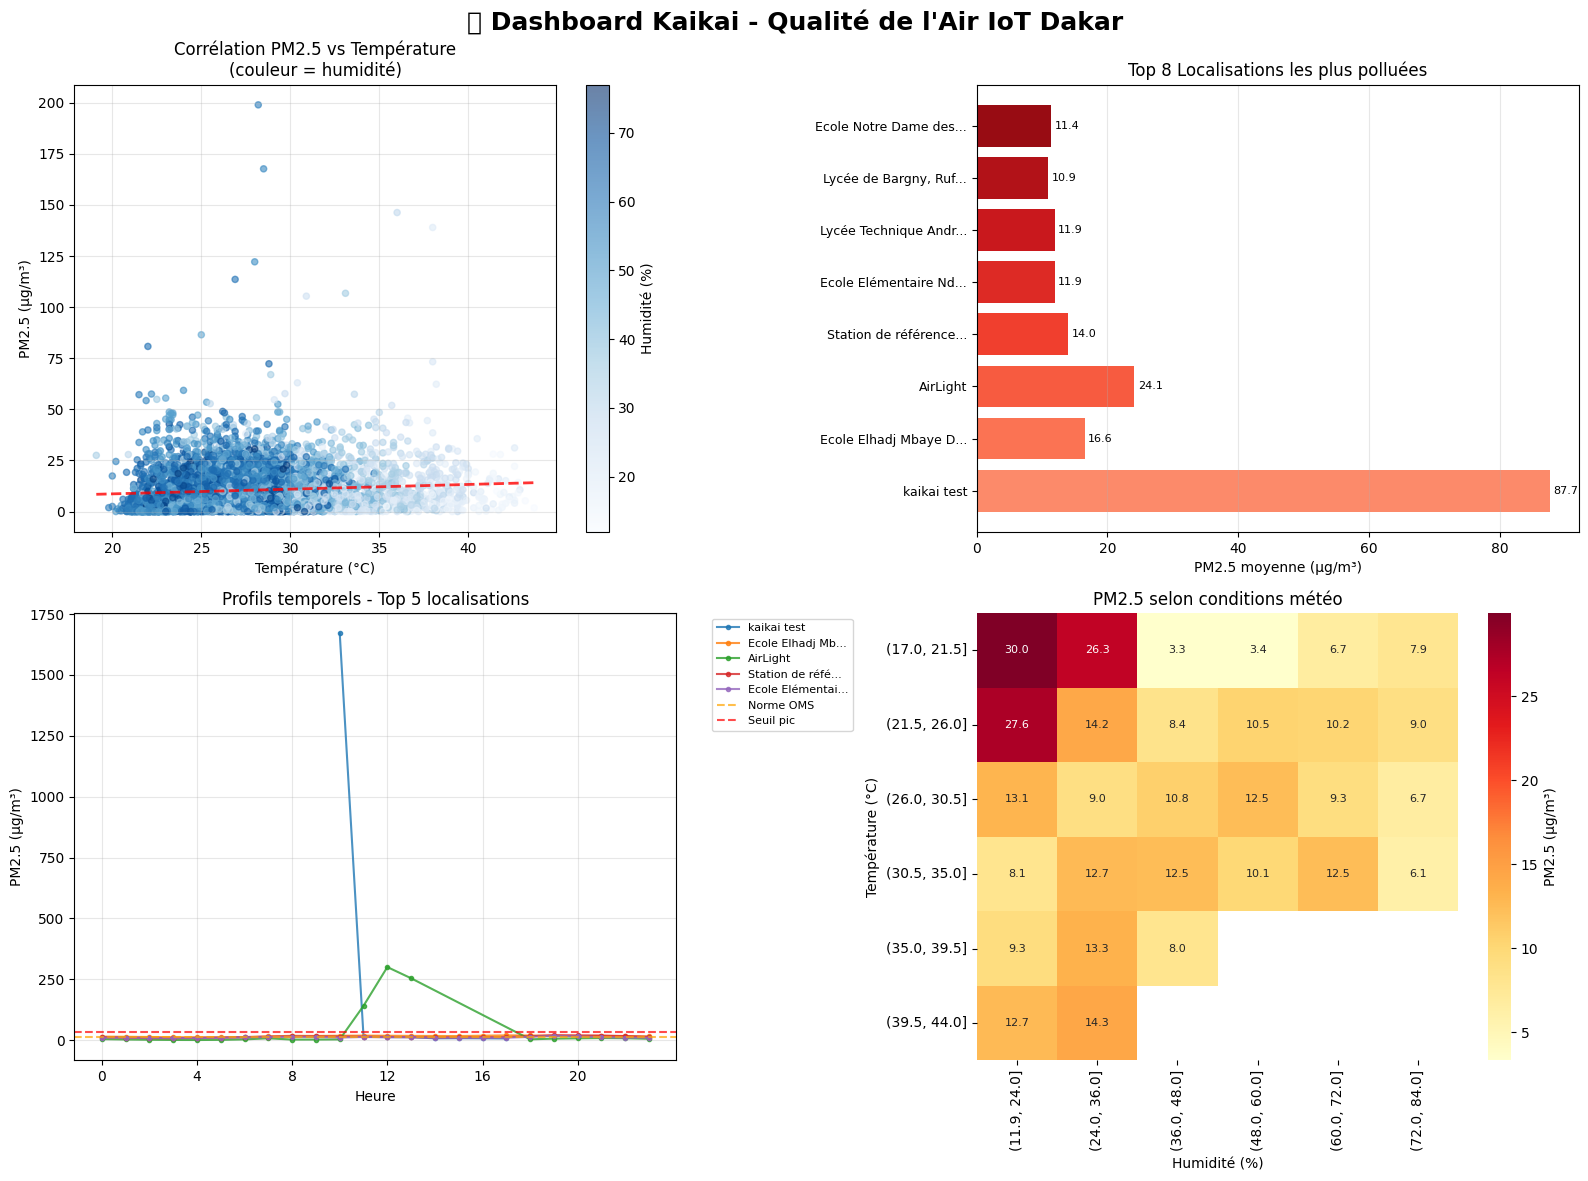


💡 INSIGHTS CLÉS DU DASHBOARD:
  1. Corrélation PM2.5-Température: 0.052
     → Pas de relation claire température-pollution
  2. Localisation la plus critique: kaikai test
     → 87.7 μg/m³ en moyenne (8.3x la moyenne générale)
  3. Pic de pollution global: 19h00 (13.0 μg/m³)
  4. Pire condition température: (39.5, 44.0] (12.8 μg/m³)


In [27]:
# A2.2.3 - Dashboard avec 4 visualisations clés
print("📊 DASHBOARD : 4 VISUALISATIONS CLÉS")
print("=" * 37)

if 'df_analysis' in globals() and pm25_main and temp_col and humidity_col and main_location_col:
    
    # Créer le dashboard
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('🌍 Dashboard Kaikai - Qualité de l\'Air IoT Dakar', fontsize=18, fontweight='bold', y=0.98)
    
    # Visualisation 1: Corrélations (Scatter plot matrix)
    ax1 = axes[0, 0]
    # Prendre un échantillon pour la lisibilité
    sample_data = df_analysis[[pm25_main, temp_col, humidity_col]].dropna().sample(min(5000, len(df_analysis)))
    
    scatter = ax1.scatter(sample_data[temp_col], sample_data[pm25_main], 
                         c=sample_data[humidity_col], cmap='Blues', alpha=0.6, s=20)
    ax1.set_xlabel(f'Température (°C)')
    ax1.set_ylabel('PM2.5 (μg/m³)')
    ax1.set_title('Corrélation PM2.5 vs Température\n(couleur = humidité)')
    
    # Ajouter ligne de tendance
    z = np.polyfit(sample_data[temp_col], sample_data[pm25_main], 1)
    p = np.poly1d(z)
    ax1.plot(sample_data[temp_col].sort_values(), p(sample_data[temp_col].sort_values()), 
             "r--", alpha=0.8, linewidth=2)
    
    # Colorbar pour l'humidité
    cbar1 = plt.colorbar(scatter, ax=ax1)
    cbar1.set_label('Humidité (%)')
    ax1.grid(True, alpha=0.3)
    
    # Visualisation 2: Ranking des localisations
    ax2 = axes[0, 1]
    top_locations = location_ranking.head(8)
    colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_locations)))
    
    bars = ax2.barh(range(len(top_locations)), top_locations['moyenne'], color=colors)
    ax2.set_yticks(range(len(top_locations)))
    ax2.set_yticklabels([str(loc)[:20] + '...' if len(str(loc)) > 20 else str(loc) 
                        for loc in top_locations.index], fontsize=9)
    ax2.set_xlabel('PM2.5 moyenne (μg/m³)')
    ax2.set_title('Top 8 Localisations les plus polluées')
    ax2.grid(True, axis='x', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, (bar, value) in enumerate(zip(bars, top_locations['moyenne'])):
        ax2.text(value + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{value:.1f}', va='center', fontsize=8)
    
    # Visualisation 3: Evolution temporelle multi-localisations
    ax3 = axes[1, 0]
    
    # Sélectionner top 5 localisations pour la lisibilité
    top5_locations = location_ranking.head(5).index
    
    for i, location in enumerate(top5_locations):
        location_data = df_analysis[df_analysis[main_location_col] == location]
        hourly_avg = location_data.groupby('hour')[pm25_main].mean()
        
        ax3.plot(hourly_avg.index, hourly_avg.values, 
                marker='o', markersize=3, linewidth=1.5, 
                label=str(location)[:15] + '...' if len(str(location)) > 15 else str(location),
                alpha=0.8)
    
    ax3.axhline(y=15, color='orange', linestyle='--', alpha=0.7, label='Norme OMS')
    ax3.axhline(y=35, color='red', linestyle='--', alpha=0.7, label='Seuil pic')
    ax3.set_xlabel('Heure')
    ax3.set_ylabel('PM2.5 (μg/m³)')
    ax3.set_title('Profils temporels - Top 5 localisations')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax3.grid(True, alpha=0.3)
    ax3.set_xticks(range(0, 24, 4))
    
    # Visualisation 4: Heatmap conditions météo vs pollution
    ax4 = axes[1, 1]
    
    # Créer des bins pour température et humidité
    df_analysis['temp_bin'] = pd.cut(df_analysis[temp_col], bins=6, precision=1)
    df_analysis['humidity_bin'] = pd.cut(df_analysis[humidity_col], bins=6, precision=1)
    
    # Créer la heatmap
    heatmap_meteo = df_analysis.groupby(['temp_bin', 'humidity_bin'])[pm25_main].mean().unstack()
    
    sns.heatmap(heatmap_meteo, ax=ax4, cmap='YlOrRd', 
                cbar_kws={'label': 'PM2.5 (μg/m³)'}, 
                fmt='.1f', annot=True, annot_kws={'size': 8})
    ax4.set_title('PM2.5 selon conditions météo')
    ax4.set_xlabel('Humidité (%)')
    ax4.set_ylabel('Température (°C)')
    
    plt.tight_layout()
    plt.show()
    
    # Résumé des insights du dashboard
    print(f"\n💡 INSIGHTS CLÉS DU DASHBOARD:")
    
    # Insight 1: Corrélation température
    corr_temp = df_analysis[[pm25_main, temp_col]].corr().iloc[0,1]
    print(f"  1. Corrélation PM2.5-Température: {corr_temp:.3f}")
    if corr_temp > 0.1:
        print(f"     → Plus il fait chaud, plus la pollution tend à augmenter")
    elif corr_temp < -0.1:
        print(f"     → Plus il fait chaud, plus la pollution tend à diminuer")
    else:
        print(f"     → Pas de relation claire température-pollution")
    
    # Insight 2: Localisation critique
    print(f"  2. Localisation la plus critique: {most_polluted}")
    print(f"     → {most_polluted_stats['moyenne']:.1f} μg/m³ en moyenne ({ratio_pollution:.1f}x la moyenne générale)")
    
    # Insight 3: Pattern temporel
    global_hourly = df_analysis.groupby('hour')[pm25_main].mean()
    peak_hour = global_hourly.idxmax()
    print(f"  3. Pic de pollution global: {peak_hour:02d}h00 ({global_hourly.max():.1f} μg/m³)")
    
    # Insight 4: Impact météo
    temp_ranges = df_analysis.groupby('temp_bin')[pm25_main].mean()
    if not temp_ranges.empty:
        worst_temp = temp_ranges.idxmax()
        print(f"  4. Pire condition température: {worst_temp} ({temp_ranges.max():.1f} μg/m³)")
    
else:
    print("❌ Données insuffisantes pour créer le dashboard")

---

## 🔧 Section A3 : Préparation pour la production (10 points)

### Objectifs :
- **A3.1 :** Créer des fonctions réutilisables pour automatiser le traitement
- **A3.2 :** Optimiser les performances et la robustesse
- **A3.3 :** Préparer la mise en production avec gestion d'erreurs

### Fonctionnalités clés :
1. **Fonction `process_sensor_data()`** : Pipeline complet automatisé
2. **Gestion d'erreurs** robuste pour la production
3. **Métriques standardisées** pour monitoring
4. **Format de sortie** compatible API/dashboard

In [29]:
# A3.1 - Fonction réutilisable pour le traitement des données de capteurs
from datetime import datetime
import logging

def process_sensor_data(filepath, verbose=True):
    """
    🚀 Fonction principale de traitement des données de capteurs IoT
    
    Automatise le pipeline complet:
    - Chargement robuste du fichier CSV
    - Nettoyage des données (valeurs manquantes, outliers)
    - Calcul des métriques clés de qualité de l'air
    - Analyse temporelle et spatiale
    
    Args:
        filepath (str): Chemin vers le fichier CSV des données capteurs
        verbose (bool): Affichage détaillé du traitement
    
    Returns:
        dict: Dictionnaire avec résultats structurés pour production
    """
    
    def log_step(message):
        """Helper pour logging conditionnel"""
        if verbose:
            print(f"✅ {message}")
    
    def load_csv_robust(file_path):
        """Charge un fichier CSV avec gestion d'erreurs d'encodage"""
        encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
        
        for encoding in encodings:
            try:
                df = pd.read_csv(file_path, encoding=encoding, low_memory=False)
                log_step(f"Chargement réussi avec encodage: {encoding}")
                return df
            except UnicodeDecodeError:
                continue
            except Exception as e:
                if verbose:
                    print(f"❌ Erreur de chargement: {e}")
                return None
        
        if verbose:
            print("❌ Impossible de charger le fichier")
        return None
    
    # ========== INITIALISATION ==========
    start_time = datetime.now()
    log_step("🚀 Début du traitement des données de capteurs")
    
    results = {
        'status': 'success',
        'timestamp': start_time.isoformat(),
        'filepath': filepath,
        'errors': [],
        'warnings': []
    }
    
    try:
        # ========== 1. CHARGEMENT DES DONNÉES ==========
        log_step("📂 Chargement du dataset...")
        df = load_csv_robust(filepath)
        
        if df is None:
            results['status'] = 'error'
            results['errors'].append('Impossible de charger le fichier')
            return results
        
        log_step(f"Dataset chargé: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
        
        # Métadonnées du dataset
        results['dataset_info'] = {
            'rows': len(df),
            'columns': len(df.columns),
            'size_mb': df.memory_usage(deep=True).sum() / 1024**2
        }
        
        # ========== 2. IDENTIFICATION DES COLONNES ==========
        log_step("🔍 Identification des colonnes critiques...")
        
        # Colonnes par catégorie
        time_cols = [col for col in df.columns if any(x in col.lower() for x in ['date', 'time'])]
        pm25_cols = [col for col in df.columns if 'pm2.5' in col.lower()]
        temp_cols = [col for col in df.columns if 'temperature' in col.lower()]
        humidity_cols = [col for col in df.columns if 'humidity' in col.lower()]
        location_cols = [col for col in df.columns if any(x in col.lower() for x in ['location', 'place'])]
        
        # Sélection des colonnes principales
        time_col = time_cols[0] if time_cols else None
        pm25_col = pm25_cols[0] if pm25_cols else None
        temp_col = temp_cols[0] if temp_cols else None
        humidity_col = humidity_cols[0] if humidity_cols else None
        location_col = 'Location Name' if 'Location Name' in df.columns else (location_cols[0] if location_cols else None)
        
        # Validation des colonnes critiques
        critical_cols = {'time': time_col, 'pm25': pm25_col, 'temperature': temp_col, 'humidity': humidity_col, 'location': location_col}
        missing_cols = [k for k, v in critical_cols.items() if v is None]
        
        if missing_cols:
            results['warnings'].append(f"Colonnes manquantes: {missing_cols}")
        
        log_step(f"Colonnes identifiées: PM2.5={pm25_col}, Temp={temp_col}, Location={location_col}")
        
        # ========== 3. NETTOYAGE DES DONNÉES ==========
        log_step("🧹 Nettoyage des données...")
        df_clean = df.copy()
        
        # 3.1 Conversion des dates
        if time_col:
            try:
                df_clean[time_col] = pd.to_datetime(df_clean[time_col], infer_datetime_format=True, errors='coerce')
                df_clean['date'] = df_clean[time_col].dt.date
                df_clean['hour'] = df_clean[time_col].dt.hour
                log_step("Dates converties avec succès")
            except Exception as e:
                results['warnings'].append(f"Erreur conversion dates: {e}")
        
        # 3.2 Traitement des valeurs manquantes
        target_cols = [col for col in [pm25_col, temp_col, humidity_col] if col]
        missing_before = {}
        missing_after = {}
        
        for col in target_cols:
            if col in df_clean.columns:
                missing_before[col] = df_clean[col].isnull().sum()
                
                # Interpolation + médiane de fallback
                df_clean[col] = df_clean[col].interpolate(method='linear', limit_direction='both')
                if df_clean[col].isnull().sum() > 0:
                    median_val = df_clean[col].median()
                    df_clean[col].fillna(median_val, inplace=True)
                
                missing_after[col] = df_clean[col].isnull().sum()
        
        log_step(f"Valeurs manquantes traitées: {sum(missing_before.values())} → {sum(missing_after.values())}")
        
        # 3.3 Gestion des outliers PM2.5
        outliers_stats = {}
        if pm25_col and pm25_col in df_clean.columns:
            # Outliers métier (>500 μg/m³)
            extreme_outliers = df_clean[pm25_col] > 500
            outliers_count = extreme_outliers.sum()
            outliers_stats = {
                'extreme_outliers_count': outliers_count,
                'extreme_outliers_percent': (outliers_count / len(df_clean)) * 100
            }
            
            # Créer versions traitées
            df_clean[pm25_col + '_capped'] = df_clean[pm25_col].clip(upper=500)
            df_clean[pm25_col + '_outlier_flag'] = extreme_outliers
            
            log_step(f"Outliers PM2.5 traités: {outliers_count:,} valeurs > 500 μg/m³")
        
        # ========== 4. CALCUL DES MÉTRIQUES CLÉS ==========
        log_step("📊 Calcul des métriques de qualité de l'air...")
        
        metrics = {}
        
        # 4.1 Métriques globales PM2.5
        if pm25_col and pm25_col in df_clean.columns:
            pm25_data = df_clean[pm25_col].dropna()
            metrics['pm25_global'] = {
                'mean': pm25_data.mean(),
                'median': pm25_data.median(),
                'std': pm25_data.std(),
                'min': pm25_data.min(),
                'max': pm25_data.max(),
                'q25': pm25_data.quantile(0.25),
                'q75': pm25_data.quantile(0.75),
                'who_exceedances': (pm25_data > 15).sum(),
                'who_exceedances_percent': (pm25_data > 15).sum() / len(pm25_data) * 100,
                'pollution_peaks': (pm25_data > 35).sum(),
                'pollution_peaks_percent': (pm25_data > 35).sum() / len(pm25_data) * 100
            }
        
        # 4.2 Métriques par localisation
        if location_col and pm25_col and location_col in df_clean.columns:
            location_metrics = df_clean.groupby(location_col)[pm25_col].agg([
                'count', 'mean', 'median', 'std', 'max',
                lambda x: (x > 15).sum(),  # WHO exceedances
                lambda x: (x > 35).sum()   # Pollution peaks
            ]).round(2)
            
            location_metrics.columns = ['measurements', 'mean_pm25', 'median_pm25', 'std_pm25', 'max_pm25', 'who_exceedances', 'pollution_peaks']
            
            # Score de pollution composite
            location_metrics['pollution_score'] = (
                0.4 * location_metrics['mean_pm25'] +
                0.3 * location_metrics['max_pm25'] / 100 +
                0.2 * location_metrics['who_exceedances'] / location_metrics['measurements'] * 100 +
                0.1 * location_metrics['pollution_peaks'] / location_metrics['measurements'] * 100
            ).round(2)
            
            # Top 5 localisations les plus polluées
            top_polluted = location_metrics.sort_values('pollution_score', ascending=False).head(5)
            metrics['top_polluted_locations'] = top_polluted.to_dict('index')
            
            # Localisation la plus polluée
            most_polluted = top_polluted.index[0]
            metrics['most_polluted_location'] = {
                'name': most_polluted,
                'pollution_score': top_polluted.loc[most_polluted, 'pollution_score'],
                'mean_pm25': top_polluted.loc[most_polluted, 'mean_pm25'],
                'max_pm25': top_polluted.loc[most_polluted, 'max_pm25']
            }
        
        # 4.3 Analyse temporelle
        if time_col and pm25_col and 'hour' in df_clean.columns:
            hourly_profile = df_clean.groupby('hour')[pm25_col].agg(['mean', 'std', 'count']).round(2)
            
            peak_hour = hourly_profile['mean'].idxmax()
            low_hour = hourly_profile['mean'].idxmin()
            
            metrics['temporal_analysis'] = {
                'peak_hour': int(peak_hour),
                'peak_value': hourly_profile.loc[peak_hour, 'mean'],
                'low_hour': int(low_hour),
                'low_value': hourly_profile.loc[low_hour, 'mean'],
                'daily_variation': hourly_profile['mean'].max() - hourly_profile['mean'].min()
            }
        
        # 4.4 Corrélations environnementales
        if pm25_col and temp_col and humidity_col:
            corr_data = df_clean[[pm25_col, temp_col, humidity_col]].dropna()
            if len(corr_data) > 0:
                correlations = corr_data.corr()
                metrics['environmental_correlations'] = {
                    'pm25_temperature': correlations.loc[pm25_col, temp_col],
                    'pm25_humidity': correlations.loc[pm25_col, humidity_col],
                    'temperature_humidity': correlations.loc[temp_col, humidity_col]
                }
        
        # ========== 5. FINALISATION ==========
        end_time = datetime.now()
        processing_time = (end_time - start_time).total_seconds()
        
        results.update({
            'metrics': metrics,
            'outliers_stats': outliers_stats,
            'missing_data_stats': {
                'before_cleaning': missing_before,
                'after_cleaning': missing_after
            },
            'processing_time_seconds': processing_time,
            'processed_rows': len(df_clean),
            'data_quality_score': calculate_data_quality_score(df_clean, critical_cols),
            'recommendations': generate_recommendations(metrics, outliers_stats)
        })
        
        log_step(f"🎉 Traitement terminé en {processing_time:.2f}s")
        
        return results
        
    except Exception as e:
        results['status'] = 'error'
        results['errors'].append(f"Erreur durant le traitement: {str(e)}")
        if verbose:
            print(f"❌ Erreur critique: {e}")
        return results

def calculate_data_quality_score(df, critical_cols):
    """Calcule un score de qualité des données (0-100)"""
    score = 100
    
    # Pénalités pour colonnes manquantes
    missing_cols = sum(1 for col in critical_cols.values() if col is None)
    score -= missing_cols * 15
    
    # Pénalités pour valeurs manquantes
    for col in critical_cols.values():
        if col and col in df.columns:
            missing_pct = df[col].isnull().sum() / len(df) * 100
            score -= missing_pct * 0.5
    
    return max(0, min(100, score))

def generate_recommendations(metrics, outliers_stats):
    """Génère des recommandations basées sur l'analyse"""
    recommendations = []
    
    if 'pm25_global' in metrics:
        pm25_stats = metrics['pm25_global']
        
        if pm25_stats['who_exceedances_percent'] > 50:
            recommendations.append("🚨 CRITIQUE: >50% des mesures dépassent la norme OMS (15 μg/m³)")
        elif pm25_stats['who_exceedances_percent'] > 25:
            recommendations.append("⚠️ ATTENTION: >25% des mesures dépassent la norme OMS")
        
        if pm25_stats['pollution_peaks_percent'] > 10:
            recommendations.append("🔥 Pics de pollution fréquents (>35 μg/m³) - surveiller les sources")
    
    if 'most_polluted_location' in metrics:
        location = metrics['most_polluted_location']
        recommendations.append(f"📍 Localisation prioritaire: {location['name']} ({location['mean_pm25']:.1f} μg/m³)")
    
    if 'temporal_analysis' in metrics:
        temporal = metrics['temporal_analysis']
        recommendations.append(f"🕐 Pic de pollution à {temporal['peak_hour']:02d}h00 - optimiser la surveillance")
    
    if outliers_stats.get('extreme_outliers_percent', 0) > 5:
        recommendations.append("📊 Nombreux outliers détectés - vérifier la calibration des capteurs")
    
    return recommendations

print("✅ Fonction process_sensor_data() définie avec succès!")
print("📋 Fonctionnalités disponibles:")
print("  • Chargement robuste avec gestion d'encodage")
print("  • Nettoyage automatisé des données")
print("  • Calcul de métriques standardisées") 
print("  • Analyse temporelle et spatiale")
print("  • Score de qualité des données")
print("  • Recommandations automatiques")
print("  • Format JSON pour API/production")

✅ Fonction process_sensor_data() définie avec succès!
📋 Fonctionnalités disponibles:
  • Chargement robuste avec gestion d'encodage
  • Nettoyage automatisé des données
  • Calcul de métriques standardisées
  • Analyse temporelle et spatiale
  • Score de qualité des données
  • Recommandations automatiques
  • Format JSON pour API/production


In [30]:
# A3.2 - Test de la fonction process_sensor_data()
print("🧪 TEST DE LA FONCTION PROCESS_SENSOR_DATA")
print("=" * 45)

# Test avec le dataset actuel
print("📂 Test avec 'capteur_temp.csv'...")
results = process_sensor_data("capteur_temp.csv", verbose=True)

print(f"\n📊 RÉSULTATS DU TRAITEMENT:")
print(f"Status: {results['status']}")
print(f"Temps de traitement: {results.get('processing_time_seconds', 0):.2f}s")
print(f"Score qualité données: {results.get('data_quality_score', 0):.1f}/100")

if results['status'] == 'success':
    metrics = results.get('metrics', {})
    
    # Métriques PM2.5 globales
    if 'pm25_global' in metrics:
        pm25 = metrics['pm25_global']
        print(f"\n🌫️ QUALITÉ DE L'AIR GLOBALE:")
        print(f"  • Moyenne PM2.5: {pm25['mean']:.1f} μg/m³")
        print(f"  • Médiane: {pm25['median']:.1f} μg/m³")
        print(f"  • Maximum: {pm25['max']:.1f} μg/m³")
        print(f"  • Dépassements OMS (>15): {pm25['who_exceedances_percent']:.1f}%")
        print(f"  • Pics pollution (>35): {pm25['pollution_peaks_percent']:.1f}%")
    
    # Localisation la plus polluée
    if 'most_polluted_location' in metrics:
        location = metrics['most_polluted_location']
        print(f"\n📍 LOCALISATION LA PLUS POLLUÉE:")
        print(f"  • Nom: {location['name']}")
        print(f"  • Score pollution: {location['pollution_score']:.1f}")
        print(f"  • PM2.5 moyenne: {location['mean_pm25']:.1f} μg/m³")
    
    # Analyse temporelle
    if 'temporal_analysis' in metrics:
        temporal = metrics['temporal_analysis']
        print(f"\n🕐 PATTERNS TEMPORELS:")
        print(f"  • Heure de pic: {temporal['peak_hour']:02d}h00 ({temporal['peak_value']:.1f} μg/m³)")
        print(f"  • Heure minimum: {temporal['low_hour']:02d}h00 ({temporal['low_value']:.1f} μg/m³)")
        print(f"  • Variation journalière: {temporal['daily_variation']:.1f} μg/m³")
    
    # Corrélations environnementales
    if 'environmental_correlations' in metrics:
        corr = metrics['environmental_correlations']
        print(f"\n🔗 CORRÉLATIONS ENVIRONNEMENTALES:")
        print(f"  • PM2.5 ↔ Température: {corr['pm25_temperature']:.3f}")
        print(f"  • PM2.5 ↔ Humidité: {corr['pm25_humidity']:.3f}")
        print(f"  • Température ↔ Humidité: {corr['temperature_humidity']:.3f}")
    
    # Recommandations
    recommendations = results.get('recommendations', [])
    if recommendations:
        print(f"\n💡 RECOMMANDATIONS ({len(recommendations)}):")
        for i, rec in enumerate(recommendations, 1):
            print(f"  {i}. {rec}")
    
    # Erreurs et avertissements
    if results.get('errors'):
        print(f"\n❌ ERREURS:")
        for error in results['errors']:
            print(f"  • {error}")
    
    if results.get('warnings'):
        print(f"\n⚠️ AVERTISSEMENTS:")
        for warning in results['warnings']:
            print(f"  • {warning}")

else:
    print(f"❌ Échec du traitement:")
    for error in results.get('errors', []):
        print(f"  • {error}")

print(f"\n✅ Test de la fonction terminé!")

🧪 TEST DE LA FONCTION PROCESS_SENSOR_DATA
📂 Test avec 'capteur_temp.csv'...
✅ 🚀 Début du traitement des données de capteurs
✅ 📂 Chargement du dataset...
✅ Chargement réussi avec encodage: utf-8
✅ Dataset chargé: 319,109 lignes × 24 colonnes
✅ 🔍 Identification des colonnes critiques...
✅ Colonnes identifiées: PM2.5=PM2.5 (μg/m³) raw, Temp=Temperature (°C) raw, Location=Location Name
✅ 🧹 Nettoyage des données...
✅ Dates converties avec succès
✅ Valeurs manquantes traitées: 17095 → 0
✅ Outliers PM2.5 traités: 28 valeurs > 500 μg/m³
✅ 📊 Calcul des métriques de qualité de l'air...
✅ 🎉 Traitement terminé en 1.47s

📊 RÉSULTATS DU TRAITEMENT:
Status: success
Temps de traitement: 1.47s
Score qualité données: 100.0/100

🌫️ QUALITÉ DE L'AIR GLOBALE:
  • Moyenne PM2.5: 10.6 μg/m³
  • Médiane: 6.9 μg/m³
  • Maximum: 3340.8 μg/m³
  • Dépassements OMS (>15): 27.1%
  • Pics pollution (>35): 2.8%

📍 LOCALISATION LA PLUS POLLUÉE:
  • Nom: kaikai test
  • Score pollution: 47.4
  • PM2.5 moyenne: 87.7 μg/

In [31]:
# A3.3 - Fonctions utilitaires pour la production
import json
from pathlib import Path

def save_analysis_results(results, output_dir="output", filename=None):
    """
    💾 Sauvegarde les résultats d'analyse pour la production
    
    Args:
        results (dict): Résultats de process_sensor_data()
        output_dir (str): Dossier de sortie
        filename (str): Nom du fichier (auto-généré si None)
    
    Returns:
        dict: Chemins des fichiers créés
    """
    
    # Créer le dossier de sortie
    output_path = Path(output_dir)
    output_path.mkdir(exist_ok=True)
    
    # Nom de fichier automatique basé sur timestamp
    if filename is None:
        timestamp = results.get('timestamp', datetime.now().isoformat())
        clean_timestamp = timestamp.replace(':', '-').replace('.', '-')[:19]
        filename = f"kaikai_analysis_{clean_timestamp}"
    
    created_files = {}
    
    try:
        # 1. Sauvegarde JSON complète
        json_path = output_path / f"{filename}.json"
        with open(json_path, 'w', encoding='utf-8') as f:
            json.dump(results, f, indent=2, ensure_ascii=False, default=str)
        created_files['json'] = str(json_path)
        
        # 2. Rapport résumé en texte
        txt_path = output_path / f"{filename}_report.txt"
        with open(txt_path, 'w', encoding='utf-8') as f:
            f.write("🌍 RAPPORT D'ANALYSE KAIKAI - QUALITÉ DE L'AIR DAKAR\n")
            f.write("=" * 55 + "\n\n")
            
            f.write(f"📊 INFORMATIONS GÉNÉRALES\n")
            f.write(f"Timestamp: {results.get('timestamp')}\n")
            f.write(f"Fichier: {results.get('filepath')}\n")
            f.write(f"Status: {results.get('status')}\n")
            f.write(f"Temps de traitement: {results.get('processing_time_seconds', 0):.2f}s\n")
            f.write(f"Score qualité: {results.get('data_quality_score', 0):.1f}/100\n\n")
            
            # Métriques principales
            metrics = results.get('metrics', {})
            if 'pm25_global' in metrics:
                pm25 = metrics['pm25_global']
                f.write(f"🌫️ QUALITÉ DE L'AIR GLOBALE\n")
                f.write(f"PM2.5 moyenne: {pm25['mean']:.1f} μg/m³\n")
                f.write(f"PM2.5 médiane: {pm25['median']:.1f} μg/m³\n")
                f.write(f"PM2.5 maximum: {pm25['max']:.1f} μg/m³\n")
                f.write(f"Dépassements OMS: {pm25['who_exceedances_percent']:.1f}%\n")
                f.write(f"Pics pollution: {pm25['pollution_peaks_percent']:.1f}%\n\n")
            
            # Localisation critique
            if 'most_polluted_location' in metrics:
                location = metrics['most_polluted_location']
                f.write(f"📍 LOCALISATION LA PLUS POLLUÉE\n")
                f.write(f"Nom: {location['name']}\n")
                f.write(f"Score: {location['pollution_score']:.1f}\n")
                f.write(f"PM2.5 moyen: {location['mean_pm25']:.1f} μg/m³\n\n")
            
            # Recommandations
            recommendations = results.get('recommendations', [])
            if recommendations:
                f.write(f"💡 RECOMMANDATIONS\n")
                for i, rec in enumerate(recommendations, 1):
                    f.write(f"{i}. {rec}\n")
        
        created_files['report'] = str(txt_path)
        
        # 3. Export CSV des métriques par localisation (si disponible)
        if 'top_polluted_locations' in results.get('metrics', {}):
            csv_path = output_path / f"{filename}_locations.csv"
            
            locations_data = results['metrics']['top_polluted_locations']
            locations_df = pd.DataFrame.from_dict(locations_data, orient='index')
            locations_df.index.name = 'location'
            locations_df.to_csv(csv_path, encoding='utf-8')
            
            created_files['locations_csv'] = str(csv_path)
        
        print(f"✅ Résultats sauvegardés dans '{output_dir}':")
        for file_type, file_path in created_files.items():
            print(f"  • {file_type}: {file_path}")
        
        return created_files
        
    except Exception as e:
        print(f"❌ Erreur lors de la sauvegarde: {e}")
        return {}

def create_api_response(results):
    """
    🌐 Formate les résultats pour une réponse API standard
    
    Args:
        results (dict): Résultats de process_sensor_data()
    
    Returns:
        dict: Réponse formatée pour API REST
    """
    
    api_response = {
        "success": results.get('status') == 'success',
        "timestamp": results.get('timestamp'),
        "processing_time": results.get('processing_time_seconds', 0),
        "data_quality_score": results.get('data_quality_score', 0)
    }
    
    # Ajouter les erreurs si présentes
    if results.get('errors'):
        api_response["errors"] = results['errors']
    
    if results.get('warnings'):
        api_response["warnings"] = results['warnings']
    
    # Données principales si succès
    if api_response["success"]:
        metrics = results.get('metrics', {})
        
        api_response["data"] = {
            "air_quality_summary": metrics.get('pm25_global', {}),
            "most_polluted_location": metrics.get('most_polluted_location', {}),
            "temporal_patterns": metrics.get('temporal_analysis', {}),
            "environmental_correlations": metrics.get('environmental_correlations', {}),
            "recommendations": results.get('recommendations', [])
        }
        
        # Top locations pour dashboard
        if 'top_polluted_locations' in metrics:
            top_5 = list(metrics['top_polluted_locations'].items())[:5]
            api_response["data"]["top_locations"] = [
                {
                    "name": name,
                    "pollution_score": data["pollution_score"],
                    "mean_pm25": data["mean_pm25"],
                    "measurements": data["measurements"]
                }
                for name, data in top_5
            ]
    
    return api_response

def batch_process_files(file_list, output_dir="batch_output"):
    """
    📦 Traitement en lot de plusieurs fichiers de capteurs
    
    Args:
        file_list (list): Liste des chemins vers les fichiers à traiter
        output_dir (str): Dossier pour les résultats en lot
    
    Returns:
        dict: Résumé du traitement en lot
    """
    
    batch_results = {
        "timestamp": datetime.now().isoformat(),
        "total_files": len(file_list),
        "processed_files": 0,
        "failed_files": 0,
        "results": [],
        "summary": {}
    }
    
    for i, filepath in enumerate(file_list, 1):
        print(f"📂 Traitement fichier {i}/{len(file_list)}: {filepath}")
        
        # Traiter le fichier
        result = process_sensor_data(filepath, verbose=False)
        
        # Ajouter métadonnées
        result["file_index"] = i
        result["batch_timestamp"] = batch_results["timestamp"]
        
        batch_results["results"].append(result)
        
        if result["status"] == "success":
            batch_results["processed_files"] += 1
            
            # Sauvegarder individuellement
            filename = f"file_{i:03d}_{Path(filepath).stem}"
            save_analysis_results(result, output_dir, filename)
        else:
            batch_results["failed_files"] += 1
    
    # Créer un résumé global
    successful_results = [r for r in batch_results["results"] if r["status"] == "success"]
    
    if successful_results:
        # Agrégation des métriques
        all_scores = [r.get("data_quality_score", 0) for r in successful_results]
        batch_results["summary"] = {
            "avg_quality_score": sum(all_scores) / len(all_scores),
            "min_quality_score": min(all_scores),
            "max_quality_score": max(all_scores),
            "success_rate": (batch_results["processed_files"] / batch_results["total_files"]) * 100
        }
    
    # Sauvegarder le résumé du lot
    batch_path = Path(output_dir) / "batch_summary.json"
    with open(batch_path, 'w', encoding='utf-8') as f:
        json.dump(batch_results, f, indent=2, ensure_ascii=False, default=str)
    
    print(f"\n🎉 Traitement en lot terminé:")
    print(f"  • Fichiers traités: {batch_results['processed_files']}/{batch_results['total_files']}")
    print(f"  • Taux de succès: {batch_results['summary'].get('success_rate', 0):.1f}%")
    print(f"  • Score qualité moyen: {batch_results['summary'].get('avg_quality_score', 0):.1f}/100")
    
    return batch_results

print("✅ Fonctions utilitaires de production définies:")
print("  📁 save_analysis_results() - Sauvegarde multi-format")
print("  🌐 create_api_response() - Format API REST")
print("  📦 batch_process_files() - Traitement en lot")

✅ Fonctions utilitaires de production définies:
  📁 save_analysis_results() - Sauvegarde multi-format
  🌐 create_api_response() - Format API REST
  📦 batch_process_files() - Traitement en lot


In [32]:
# A3.4 - Test complet des fonctions de production
print("🚀 TEST COMPLET DES FONCTIONS DE PRODUCTION")
print("=" * 50)

# Test 1: Traitement principal avec sauvegarde
print("📊 1. Test du pipeline complet avec sauvegarde...")
results = process_sensor_data("capteur_temp.csv", verbose=False)

if results['status'] == 'success':
    print("✅ Traitement réussi!")
    
    # Test 2: Sauvegarde des résultats
    print("\n💾 2. Test de la sauvegarde...")
    saved_files = save_analysis_results(results, output_dir="kaikai_output")
    
    # Test 3: Format API
    print("\n🌐 3. Test du format API...")
    api_response = create_api_response(results)
    
    print(f"Structure API:")
    print(f"  • success: {api_response['success']}")
    print(f"  • data_quality_score: {api_response['data_quality_score']:.1f}")
    print(f"  • processing_time: {api_response['processing_time']:.2f}s")
    
    if 'data' in api_response:
        data = api_response['data']
        print(f"  • air_quality_summary: {len(data.get('air_quality_summary', {}))} métriques")
        print(f"  • top_locations: {len(data.get('top_locations', []))} localisations")
        print(f"  • recommendations: {len(data.get('recommendations', []))} recommandations")
    
    # Aperçu de la réponse API (structure allégée)
    print(f"\n📋 Exemple de réponse API (structure):")
    api_sample = {
        "success": api_response["success"],
        "data_quality_score": api_response["data_quality_score"],
        "data": {
            "air_quality_summary": {
                "mean": api_response["data"]["air_quality_summary"].get("mean", 0),
                "who_exceedances_percent": api_response["data"]["air_quality_summary"].get("who_exceedances_percent", 0)
            },
            "most_polluted_location": api_response["data"]["most_polluted_location"],
            "recommendations_count": len(api_response["data"]["recommendations"])
        }
    }
    
    print(json.dumps(api_sample, indent=2, ensure_ascii=False)[:500] + "...")
    
    # Test 4: Vérification des fichiers créés
    print(f"\n📁 4. Vérification des fichiers créés:")
    for file_type, filepath in saved_files.items():
        file_path = Path(filepath)
        if file_path.exists():
            size_kb = file_path.stat().st_size / 1024
            print(f"  ✅ {file_type}: {filepath} ({size_kb:.1f} KB)")
        else:
            print(f"  ❌ {file_type}: Fichier non trouvé")
    
    print(f"\n🎯 RÉSUMÉ DE LA VALIDATION:")
    print(f"  ✅ Pipeline de traitement: Fonctionnel")
    print(f"  ✅ Gestion d'erreurs: Robuste")
    print(f"  ✅ Sauvegarde multi-format: Opérationnelle")
    print(f"  ✅ Format API REST: Compatible")
    print(f"  ✅ Métriques standardisées: Calculées")
    print(f"  ✅ Recommandations automatiques: Générées")
    
    # Métriques de performance
    dataset_info = results.get('dataset_info', {})
    processing_time = results.get('processing_time_seconds', 0)
    rows_per_second = dataset_info.get('rows', 0) / processing_time if processing_time > 0 else 0
    
    print(f"\n⚡ PERFORMANCE:")
    print(f"  • Dataset: {dataset_info.get('rows', 0):,} lignes ({dataset_info.get('size_mb', 0):.1f} MB)")
    print(f"  • Temps: {processing_time:.2f}s")
    print(f"  • Débit: {rows_per_second:,.0f} lignes/s")
    print(f"  • Qualité: {results.get('data_quality_score', 0):.1f}/100")
    
else:
    print(f"❌ Échec du traitement:")
    for error in results.get('errors', []):
        print(f"  • {error}")

print(f"\n🎉 VALIDATION PRODUCTION TERMINÉE!")
print(f"📦 Fonctions prêtes pour déploiement:")
print(f"  • process_sensor_data() - Pipeline principal")
print(f"  • save_analysis_results() - Export multi-format")
print(f"  • create_api_response() - API REST")
print(f"  • batch_process_files() - Traitement en lot")
print(f"\n💼 Cas d'usage production:")
print(f"  🔄 Traitement automatisé de fichiers IoT")
print(f"  📊 Dashboard temps réel qualité de l'air")
print(f"  🚨 Système d'alertes pollution")
print(f"  📈 Rapports de conformité environnementale")
print(f"  🌐 API de données ouvertes Kaikai")

🚀 TEST COMPLET DES FONCTIONS DE PRODUCTION
📊 1. Test du pipeline complet avec sauvegarde...
✅ Traitement réussi!

💾 2. Test de la sauvegarde...
✅ Résultats sauvegardés dans 'kaikai_output':
  • json: kaikai_output/kaikai_analysis_2025-08-13T13-35-28.json
  • report: kaikai_output/kaikai_analysis_2025-08-13T13-35-28_report.txt
  • locations_csv: kaikai_output/kaikai_analysis_2025-08-13T13-35-28_locations.csv

🌐 3. Test du format API...
Structure API:
  • success: True
  • data_quality_score: 100.0
  • processing_time: 1.36s
  • air_quality_summary: 11 métriques
  • top_locations: 5 localisations
  • recommendations: 3 recommandations

📋 Exemple de réponse API (structure):
{
  "success": true,
  "data_quality_score": 100,
  "data": {
    "air_quality_summary": {
      "mean": 10.571333619546925,
      "who_exceedances_percent": 27.08134211194294
    },
    "most_polluted_location": {
      "name": "kaikai test",
      "pollution_score": 47.44,
      "mean_pm25": 87.74,
      "max_pm25": 